# Part A

# Data Wrangling & EDA(Exploratory Data Analysis)

* Here we will be doing Exploratory Data Analysis on data, we will be observing the dataset and then finding any missing values, to categorize values, to find the shape of dataset by plotting to identify relationships in dataset. Then locating any outliers in dataset. Organizing a dataset. 
After doing EDA, we will find which features are less important so we can easily remove them from data.
Then we are ploting boxplot for few features of the data. To remove outlier using boxplot, calculating the first and third quartile, then evaluate the interquartile range, estimate the lower bound and upper bound, replacing the data points that lie outside of the lower and the upper bound with a NULL value. 


In [281]:
import warnings
warnings.filterwarnings('ignore')

In [282]:
#Import Required libraries and Data File

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [283]:
data = pd.read_csv('CE802_P3_Data.csv')
test_df = pd.read_csv('CE802_P3_Test.csv')

In [284]:
test_data = test_df.iloc[:,:-1].copy()
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,293.42,126.36,Europe,-23.90,3012.33,-196.64,-15368.82,112.52,1029.51,9.40,...,1101.42,1113.48,358.83,-8406.72,2.52,-94.58,214.96,-191.24,875.31,7
1,242.26,49.12,Rest,-17.56,2485.47,5.10,-38092.89,25.94,522.92,11.82,...,739.58,1336.84,95.70,-6739.56,5.46,-20.49,122.34,-165.19,778.98,5
2,130.54,62.32,Rest,-27.34,1973.40,1.98,-21792.75,89.28,551.56,12.51,...,113.28,2011.40,336.66,-5784.03,5.18,-33.16,257.62,-165.89,688.42,4
3,171.62,144.70,Rest,-20.70,2167.92,-20.82,-10528.14,91.22,1207.56,12.88,...,1289.56,2534.52,282.03,-6799.92,0.60,-25.08,190.10,-74.90,1075.49,2
4,155.78,-202.92,Rest,-24.86,2657.28,17.24,-23577.09,75.84,425.77,6.35,...,22.98,2788.68,337.71,-5896.68,1.87,14.65,188.12,-202.21,575.51,1


In [285]:
df_data = data.copy()
df_data.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,271.78,-21.92,UK,-10.80,1899.57,17.98,-21749.82,91.94,855.61,10.01,...,2098.80,500.16,-6325.53,1.36,-33.14,177.34,-141.97,101.52,5,189.03
1,202.54,43.82,USA,-16.94,1941.57,-9.16,-27668.04,93.50,975.44,7.29,...,1668.70,434.97,-6172.05,2.59,-58.87,87.48,-154.11,623.22,6,187.17
2,220.26,88.90,Europe,-18.76,2298.12,-18.38,-11548.56,65.16,1114.28,12.05,...,2604.56,252.93,-10132.68,2.94,-40.89,271.00,-279.84,284.96,2,1016.24
3,141.00,140.72,Europe,-19.86,-133.32,-57.00,-16200.96,-14.00,910.12,4.54,...,2595.56,154.83,-7862.04,0.86,-117.03,201.66,-153.93,532.19,4,-141.18
4,165.04,2.74,Europe,-21.34,3077.07,-20.50,-25683.06,29.08,216.24,10.10,...,1066.80,316.68,-6093.81,3.59,-63.84,211.82,-182.34,373.14,5,33.17


In [286]:
test_data.shape

(1500, 36)

In [287]:
df_data.shape

(1500, 37)

In [288]:
y = df_data["Target"]  #training data
df_data = df_data.drop(columns="Target")
df_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36
0,271.78,-21.92,UK,-10.80,1899.57,17.98,-21749.82,91.94,855.61,10.01,...,-512.54,2098.80,500.16,-6325.53,1.36,-33.14,177.34,-141.97,101.52,5
1,202.54,43.82,USA,-16.94,1941.57,-9.16,-27668.04,93.50,975.44,7.29,...,593.84,1668.70,434.97,-6172.05,2.59,-58.87,87.48,-154.11,623.22,6
2,220.26,88.90,Europe,-18.76,2298.12,-18.38,-11548.56,65.16,1114.28,12.05,...,89.96,2604.56,252.93,-10132.68,2.94,-40.89,271.00,-279.84,284.96,2
3,141.00,140.72,Europe,-19.86,-133.32,-57.00,-16200.96,-14.00,910.12,4.54,...,233.04,2595.56,154.83,-7862.04,0.86,-117.03,201.66,-153.93,532.19,4
4,165.04,2.74,Europe,-21.34,3077.07,-20.50,-25683.06,29.08,216.24,10.10,...,-284.12,1066.80,316.68,-6093.81,3.59,-63.84,211.82,-182.34,373.14,5


In [289]:
df_data.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36'],
      dtype='object')

In [290]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   object 
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   object 
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [291]:
df_data.describe(include=["O"])

,F3,F11
count,1500,1500
unique,4,5
top,Rest,High
freq,393,307


In [292]:
np.unique(df_data['F3'])

array(['Europe', 'Rest', 'UK', 'USA'], dtype=object)

In [293]:
np.unique(df_data['F11'])

array(['High', 'Low', 'Medium', 'Very high', 'Very low'], dtype=object)

In [294]:
#Get one hot encoding of columns 

one_hot = pd.get_dummies(df_data['F3'])
# Drop column F3 as it is now encoded
df_data = df_data.drop('F3',axis = 1)
# Join the encoded df
df_data = df_data.join(one_hot)
df_data.head(2)


,F1,F2,F4,F5,F6,F7,F8,F9,F10,F11,...,F31,F32,F33,F34,F35,F36,Europe,Rest,UK,USA
0,271.78,-21.92,-10.80,1899.57,17.98,-21749.82,91.94,855.61,10.01,Very low,...,1.36,-33.14,177.34,-141.97,101.52,5,0,0,1,0
1,202.54,43.82,-16.94,1941.57,-9.16,-27668.04,93.50,975.44,7.29,Medium,...,2.59,-58.87,87.48,-154.11,623.22,6,0,0,0,1


In [295]:
one_hot = pd.get_dummies(df_data['F11'])
# Drop column F11 as it is now encoded
df_data = df_data.drop('F11',axis = 1)
# Join the encoded df
df_data = df_data.join(one_hot)
df_data.head(2)


,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,271.78,-21.92,-10.80,1899.57,17.98,-21749.82,91.94,855.61,10.01,3.74,...,5,0,0,1,0,0,0,0,0,1
1,202.54,43.82,-16.94,1941.57,-9.16,-27668.04,93.50,975.44,7.29,12.24,...,6,0,0,0,1,0,0,1,0,0


In [296]:
one_hot = pd.get_dummies(test_data['F3'])
# Drop column B as it is now encoded
test_data = test_data.drop('F3',axis = 1)
# Join the encoded df
test_data = test_data.join(one_hot)
test_data.head(2)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F11,...,F31,F32,F33,F34,F35,F36,Europe,Rest,UK,USA
0,293.42,126.36,-23.90,3012.33,-196.64,-15368.82,112.52,1029.51,9.40,Medium,...,2.52,-94.58,214.96,-191.24,875.31,7,1,0,0,0
1,242.26,49.12,-17.56,2485.47,5.10,-38092.89,25.94,522.92,11.82,Very high,...,5.46,-20.49,122.34,-165.19,778.98,5,0,1,0,0


In [297]:
one_hot = pd.get_dummies(test_data['F11'])
# Drop column B as it is now encoded
test_data = test_data.drop('F11',axis = 1)
# Join the encoded df
test_data = test_data.join(one_hot)
test_data.head(2)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,293.42,126.36,-23.90,3012.33,-196.64,-15368.82,112.52,1029.51,9.40,15.62,...,7,1,0,0,0,0,0,1,0,0
1,242.26,49.12,-17.56,2485.47,5.10,-38092.89,25.94,522.92,11.82,23.28,...,5,0,1,0,0,0,0,0,1,0


In [298]:
df_data.columns

Index(['F1', 'F2', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F12', 'F13',
       'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
       'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33',
       'F34', 'F35', 'F36', 'Europe', 'Rest', 'UK', 'USA', 'High', 'Low',
       'Medium', 'Very high', 'Very low'],
      dtype='object')

In [299]:
#feature scaling
min_max_scaler = MinMaxScaler()
x_scaled_minmax = min_max_scaler.fit_transform(df_data)
df_data = pd.DataFrame(x_scaled_minmax, columns = df_data.columns)

df_data.head(3)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,0.629042,0.482979,0.6820,0.452963,0.548104,0.524386,0.530945,0.563399,0.600329,0.336295,...,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.461973,0.567239,0.5285,0.455851,0.510941,0.431898,0.535054,0.630891,0.536494,0.454318,...,0.545455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.504729,0.625019,0.4830,0.480371,0.498316,0.683808,0.460416,0.709089,0.648205,0.380450,...,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [300]:
# feature scaling test set
x_scaled_minmax_test = min_max_scaler.fit_transform(test_data)
test_data = pd.DataFrame(x_scaled_minmax_test, columns = test_data.columns)

test_data.head(2)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,0.688026,0.636467,0.395062,0.434648,0.204646,0.691485,0.611088,0.582071,0.516627,0.625989,...,0.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.569764,0.546476,0.558128,0.392702,0.438504,0.307879,0.385525,0.330899,0.574109,0.712542,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [301]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   F1         1500 non-null   float64
 1   F2         1500 non-null   float64
 2   F4         1500 non-null   float64
 3   F5         1500 non-null   float64
 4   F6         1500 non-null   float64
 5   F7         1500 non-null   float64
 6   F8         1500 non-null   float64
 7   F9         1500 non-null   float64
 8   F10        1500 non-null   float64
 9   F12        1500 non-null   float64
 10  F13        1500 non-null   float64
 11  F14        1500 non-null   float64
 12  F15        1500 non-null   float64
 13  F16        1500 non-null   float64
 14  F17        1500 non-null   float64
 15  F18        1500 non-null   float64
 16  F19        1500 non-null   float64
 17  F20        1500 non-null   float64
 18  F21        1500 non-null   float64
 19  F22        1500 non-null   float64
 20  F23     

In [302]:
df_data.describe()

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.459915,0.533902,0.437878,0.476868,0.524264,0.480395,0.501027,0.515894,0.576929,0.488637,...,0.361576,0.252000,0.262000,0.242667,0.243333,0.204667,0.190667,0.196000,0.204000,0.204667
std,0.146477,0.110960,0.149240,0.087245,0.112578,0.139013,0.154472,0.173025,0.097594,0.117049,...,0.159619,0.434306,0.439869,0.428838,0.429238,0.403592,0.392958,0.397101,0.403103,0.403592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.357169,0.479287,0.334375,0.434543,0.467842,0.384362,0.399407,0.398956,0.525698,0.433074,...,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.462673,0.535568,0.439250,0.478189,0.523552,0.484171,0.497761,0.519386,0.579441,0.487920,...,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.553856,0.592310,0.534125,0.519246,0.581473,0.574184,0.609600,0.633660,0.629430,0.547070,...,0.454545,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [303]:
df_data.isnull().sum()

F1           0
F2           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
F31          0
F32          0
F33          0
F34          0
F35          0
F36          0
Europe       0
Rest         0
UK           0
USA          0
High         0
Low          0
Medium       0
Very high    0
Very low     0
dtype: int64

In [304]:
test_data.isnull().sum()

F1           0
F2           0
F4           0
F5           0
F6           0
F7           0
F8           0
F9           0
F10          0
F12          0
F13          0
F14          0
F15          0
F16          0
F17          0
F18          0
F19          0
F20          0
F21          0
F22          0
F23          0
F24          0
F25          0
F26          0
F27          0
F28          0
F29          0
F30          0
F31          0
F32          0
F33          0
F34          0
F35          0
F36          0
Europe       0
Rest         0
UK           0
USA          0
High         0
Low          0
Medium       0
Very high    0
Very low     0
dtype: int64

In [305]:
df_data['F36'].value_counts()

0.363636    333
0.272727    292
0.454545    273
0.181818    214
0.545455    158
0.090909     90
0.636364     84
0.727273     33
0.000000     15
0.818182      6
0.909091      1
1.000000      1
Name: F36, dtype: int64

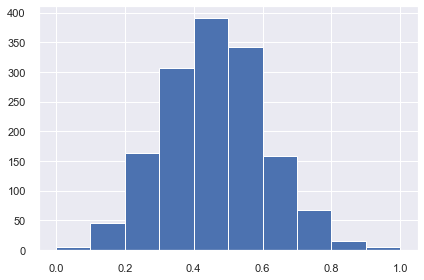

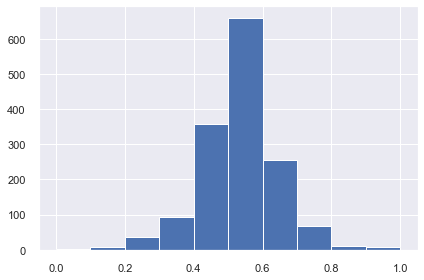

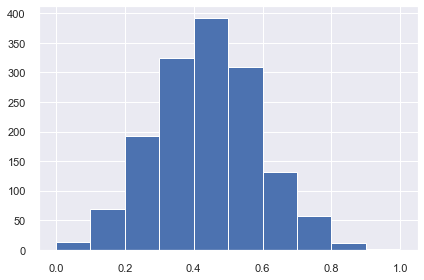

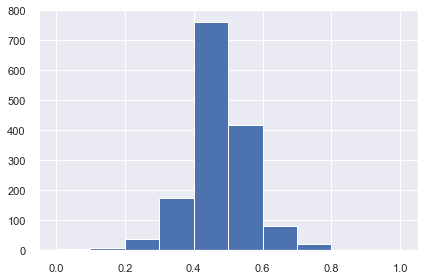

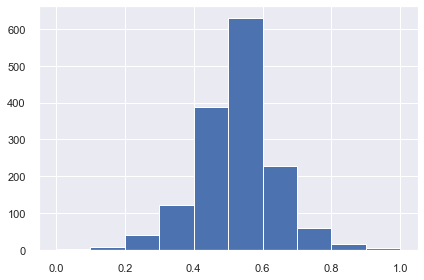

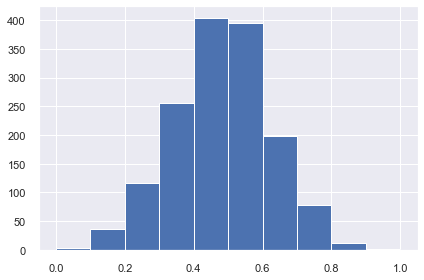

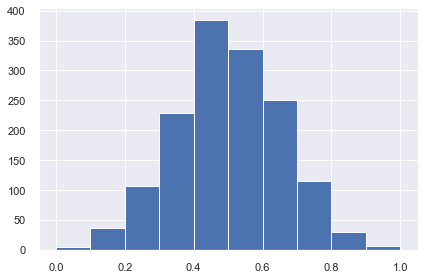

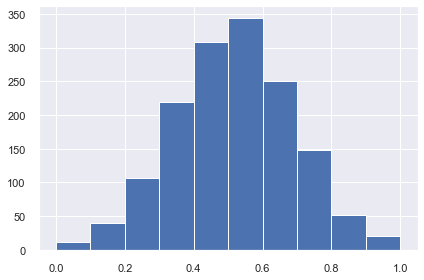

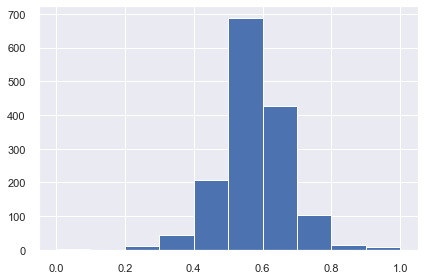

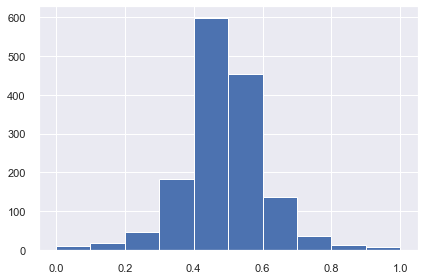

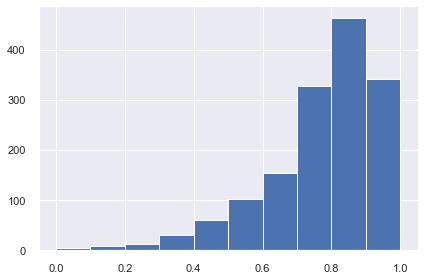

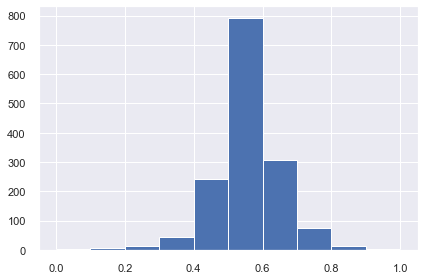

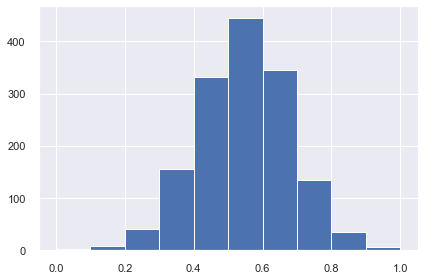

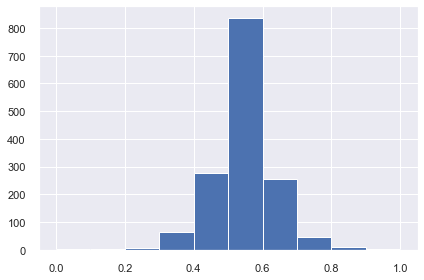

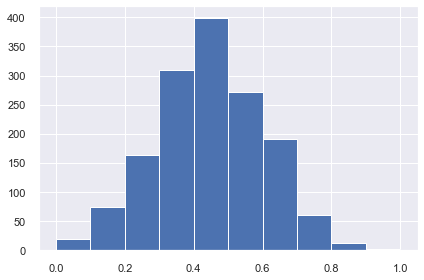

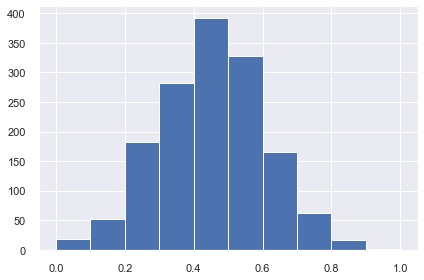

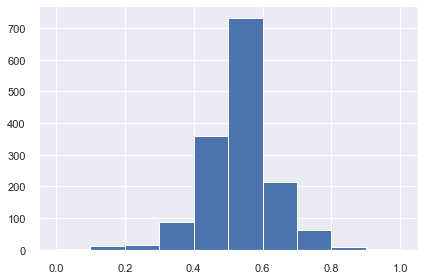

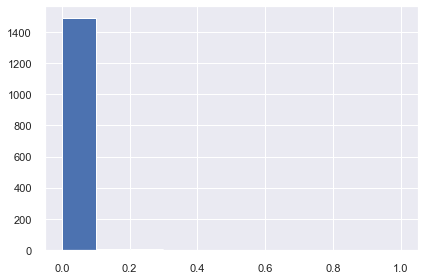

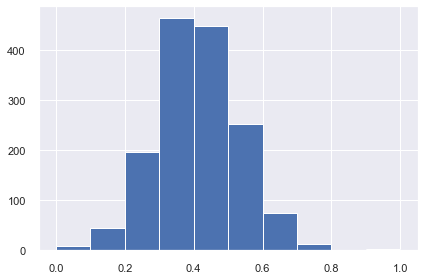

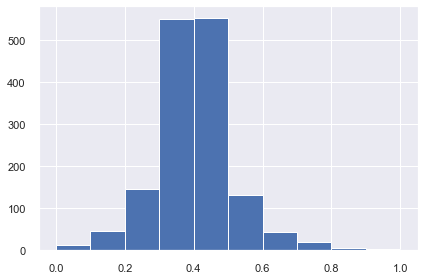

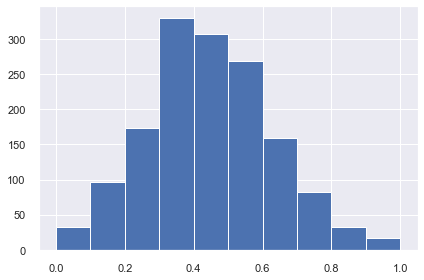

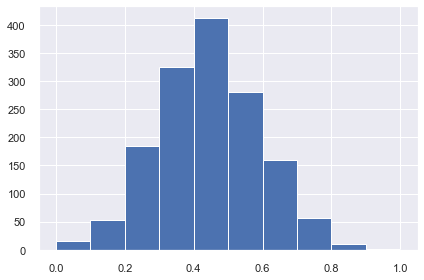

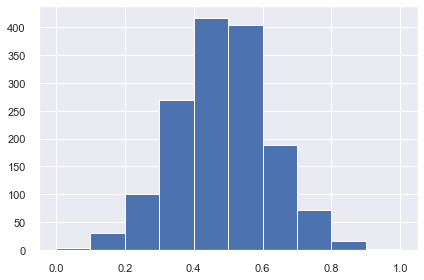

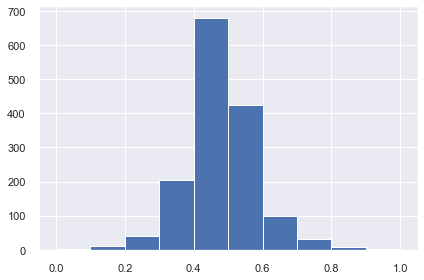

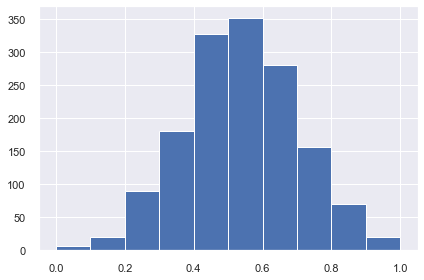

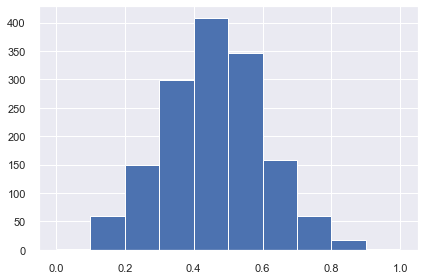

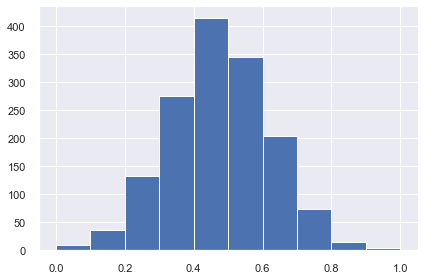

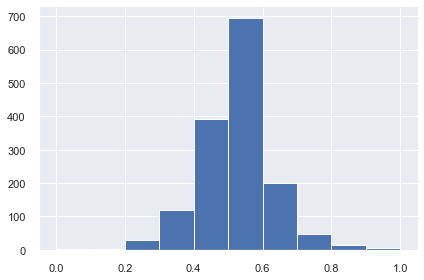

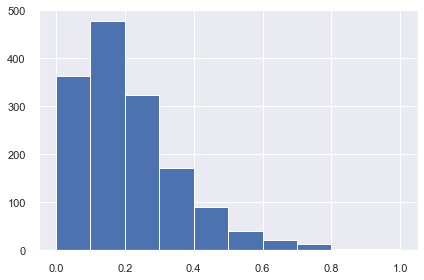

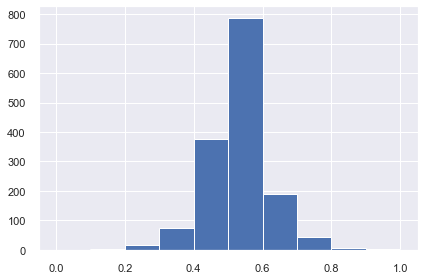

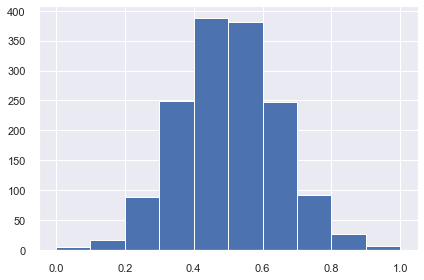

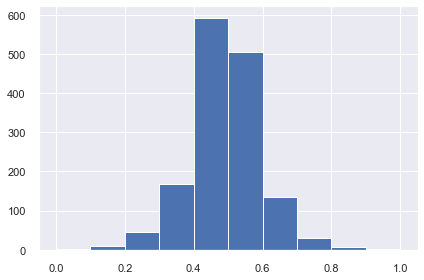

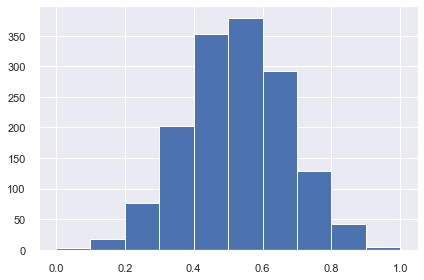

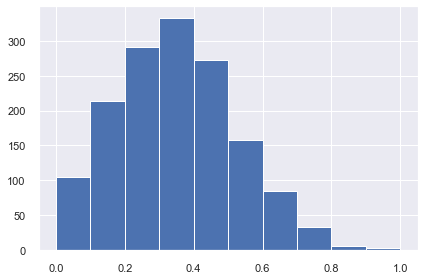

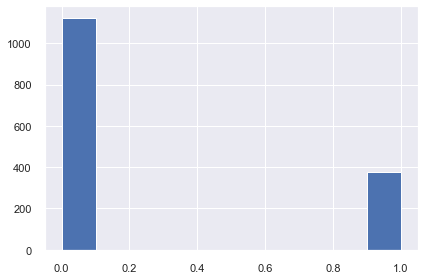

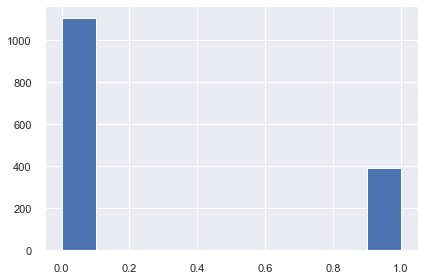

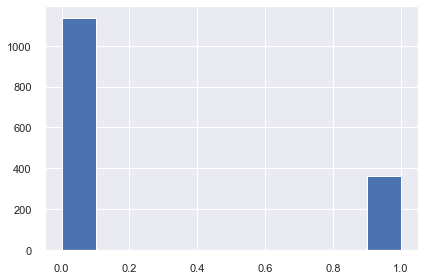

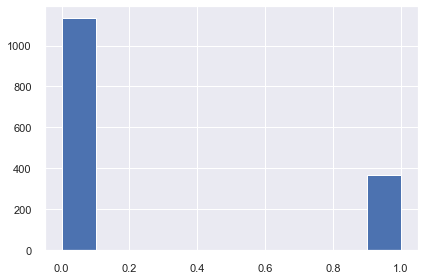

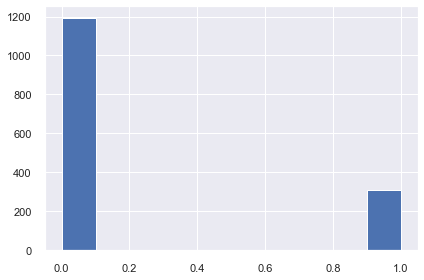

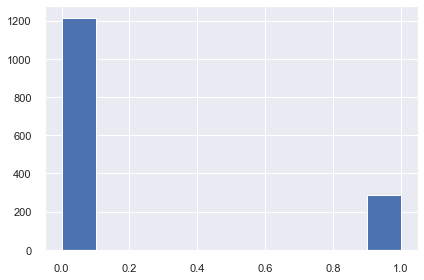

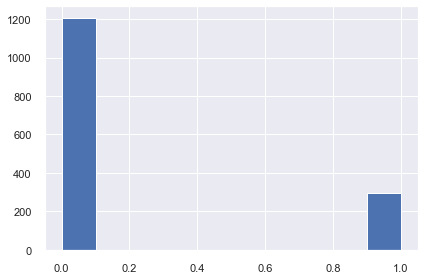

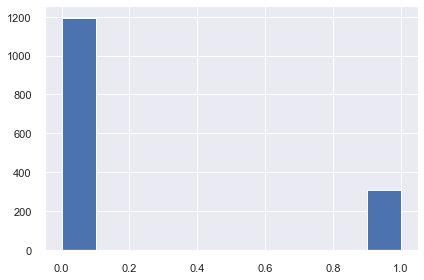

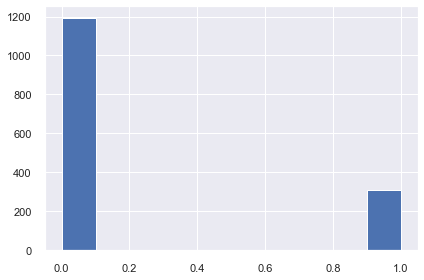

In [306]:
for i in df_data.columns:
    plt.figure()
    plt.hist(df_data[i])

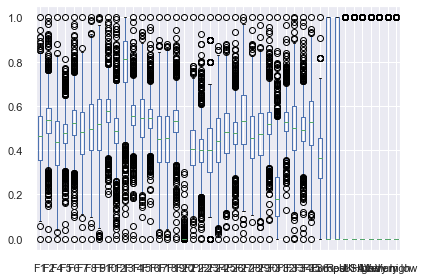

In [307]:
df_data.plot.box()
plt.show()

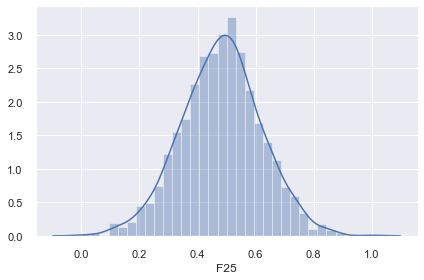

In [308]:
sns.distplot(df_data['F25'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x219c7463148>,
  ...],
 'caps': [<matplotlib.lines.Line2D at 0x219c7441c08>,
  ...],
 'boxes': [<matplotlib.patches.PathPatch at 0x219c7468b48>,
  ...],
 'medians': [<matplotlib.lines.Line2D at 0x219c7445bc8>,
  ...],
 'fliers': [<matplotlib.lines.Line2D at 0x219c7444a88>,
  ...],
 'means': []}

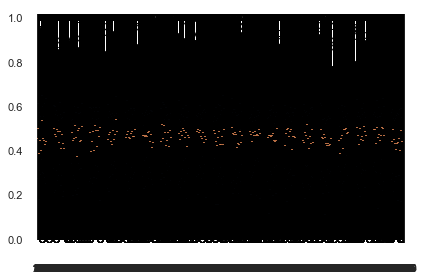

In [309]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df_data, widths = 0.6, patch_artist = True)

In [310]:
df_data.nunique()

F1           1412
F2           1421
F4            839
F5           1487
F6           1423
F7           1500
F8           1396
F9           1492
F10           910
F12           911
F13           732
F14          1409
F15          1495
F16           889
F17          1499
F18          1499
F19           905
F20           737
F21          1485
F22           900
F23            11
F24          1500
F25          1498
F26          1409
F27          1485
F28          1492
F29          1382
F30          1494
F31           723
F32          1410
F33          1402
F34          1406
F35          1494
F36            12
Europe          2
Rest            2
UK              2
USA             2
High            2
Low             2
Medium          2
Very high       2
Very low        2
dtype: int64

In [311]:
test_data.nunique()

F1           1413
F2           1410
F4            834
F5           1491
F6           1421
F7           1499
F8           1390
F9           1493
F10           929
F12           903
F13           729
F14          1414
F15          1489
F16           934
F17          1499
F18          1499
F19           908
F20           701
F21          1488
F22           924
F23            12
F24          1500
F25          1499
F26          1414
F27          1489
F28          1490
F29          1398
F30          1491
F31           706
F32          1410
F33          1409
F34          1410
F35          1474
F36            11
Europe          2
Rest            2
UK              2
USA             2
High            2
Low             2
Medium          2
Very high       2
Very low        2
dtype: int64

In [312]:
df_data.duplicated().sum()

0

In [313]:
test_data.duplicated().sum()

0

## Feature Selection

The below heat map shows the corelation of different columns with eachother. A heatmap often helps to view the corelation as seen above. Looking at the above heatmap we can conclude that which attributes or columns are corelated and and can be removed to get a better shaped dataset.

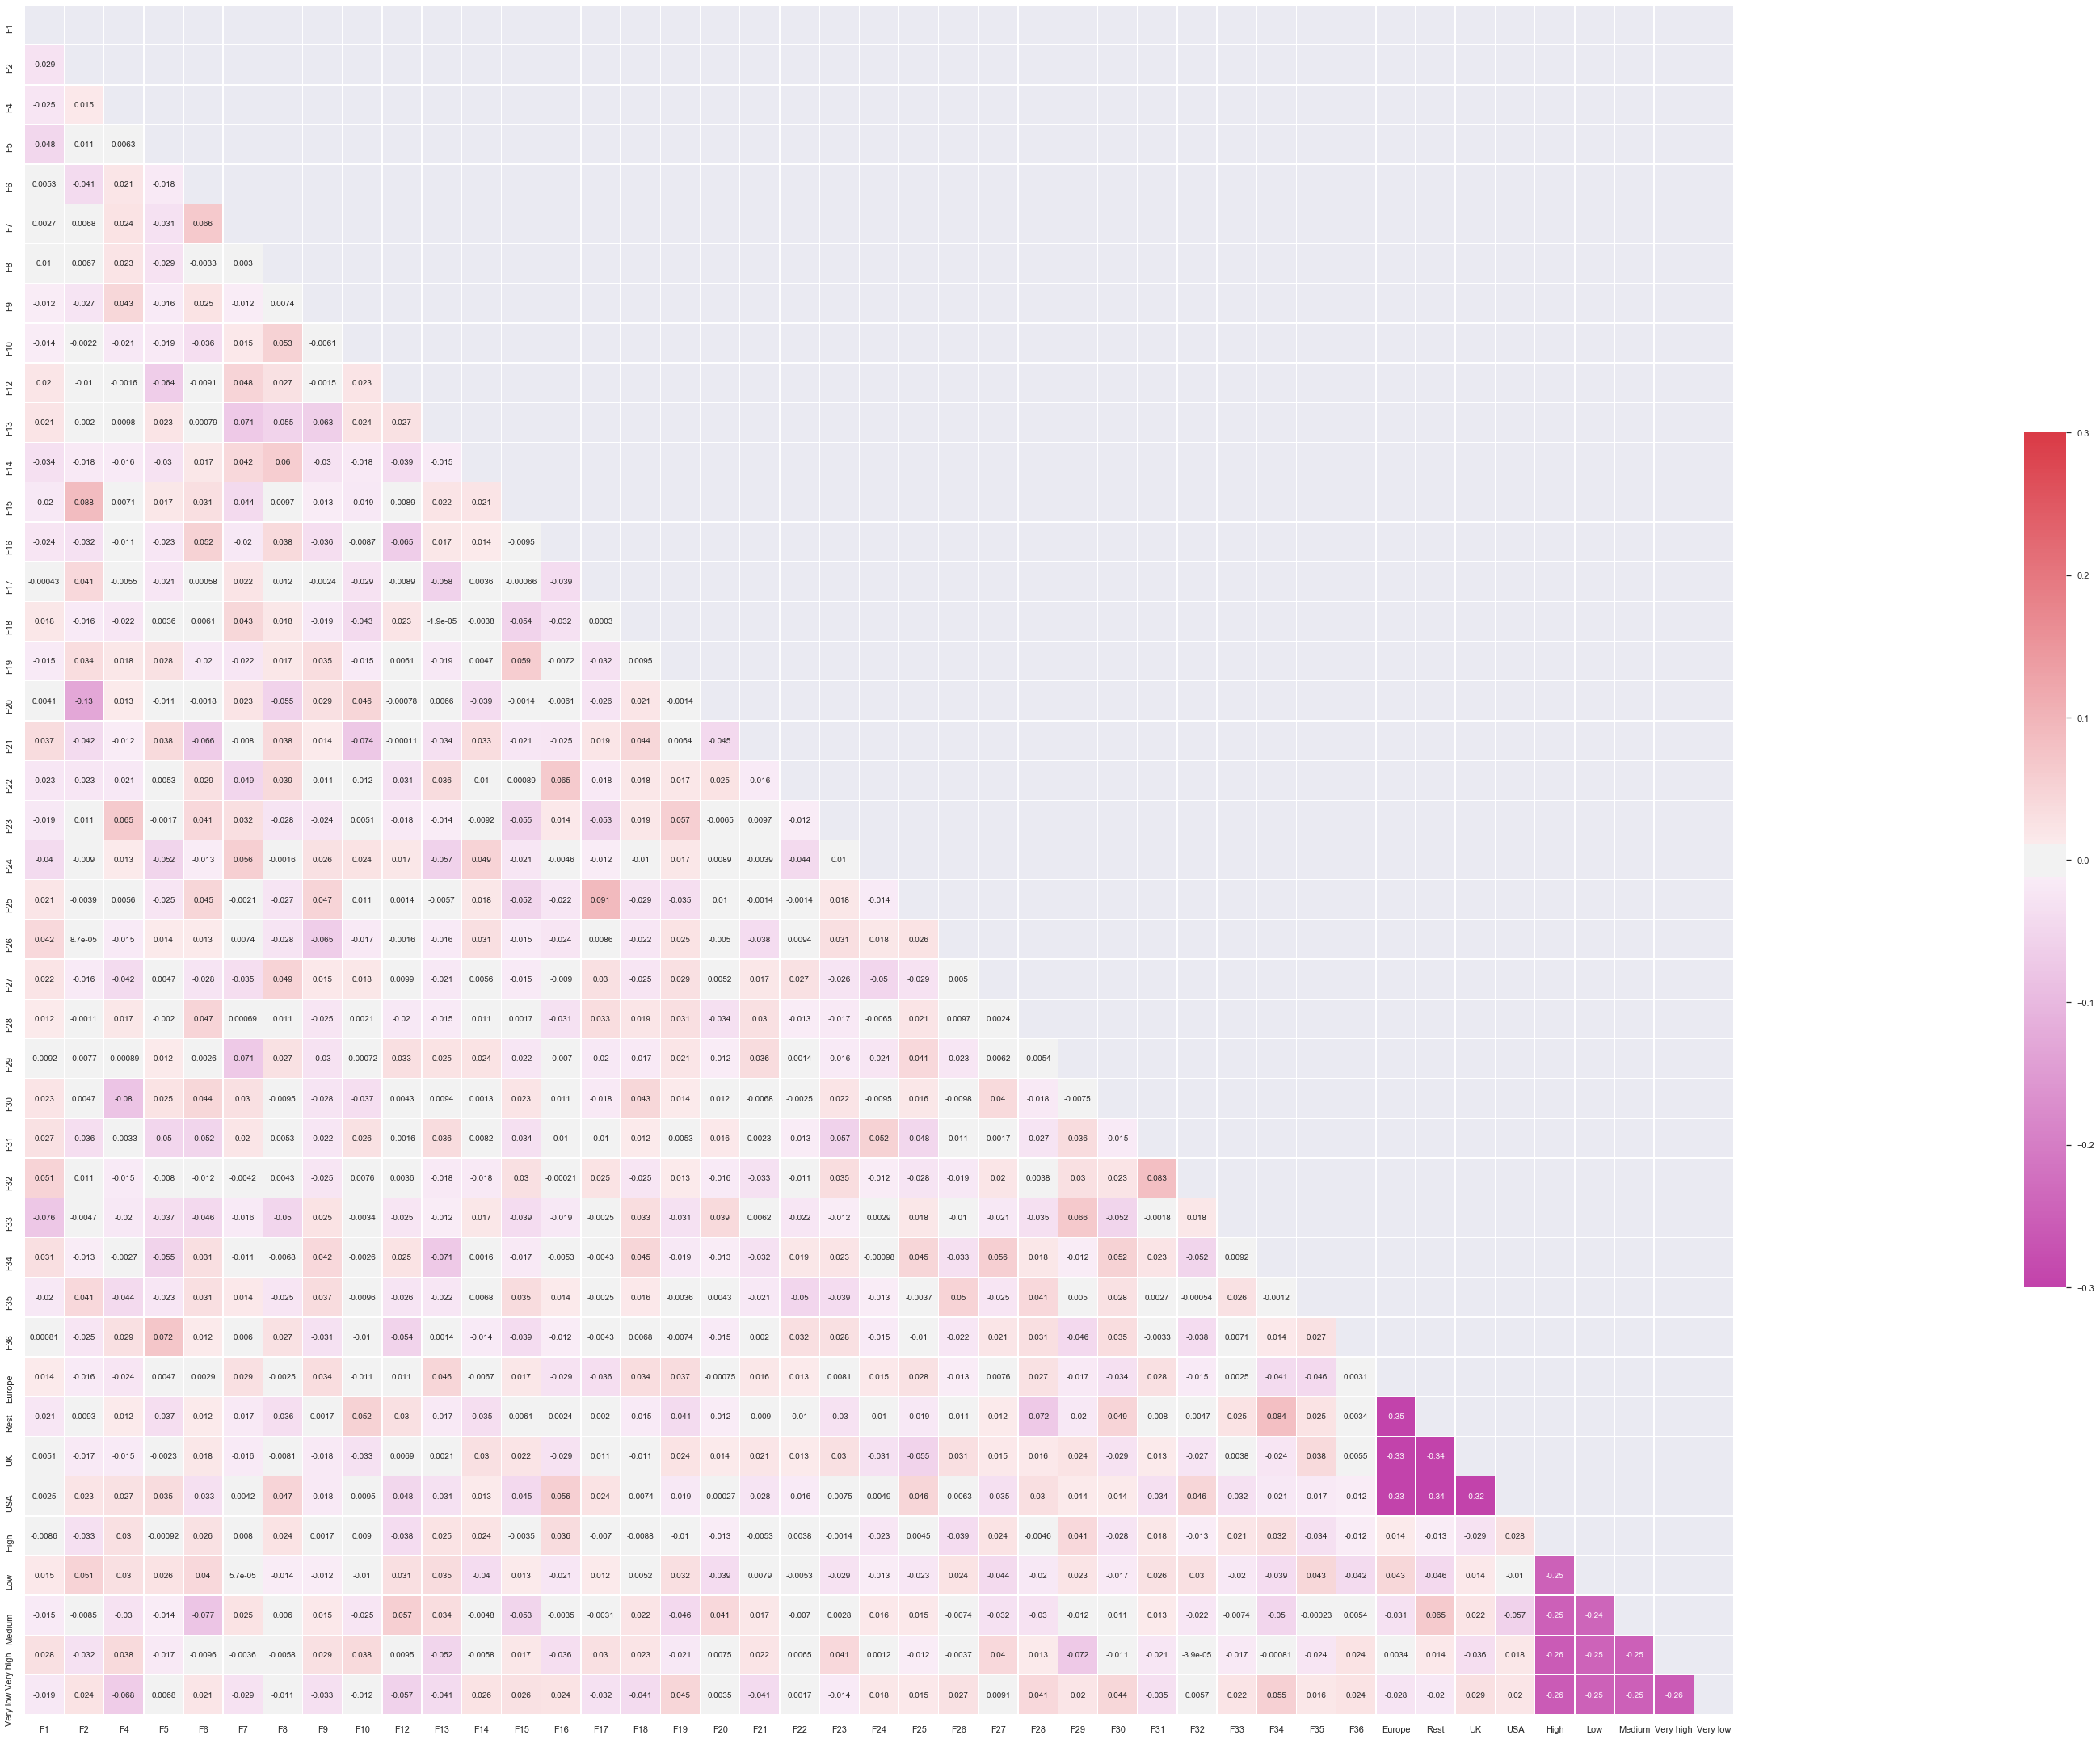

In [314]:
mask = np.zeros_like(df_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(320, 10, as_cmap=True)
plt.figure(figsize=(100,30))
sns.heatmap(
    cor,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    vmax=.3,       # The maximum value of the legend. All higher vals will be same color
    vmin=-.3,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
    cbar_kws={"shrink": .5}  # Extra kwargs for the legend; in this case, shrink by 50%
)

## Ways to Detect and Remove the Outliers

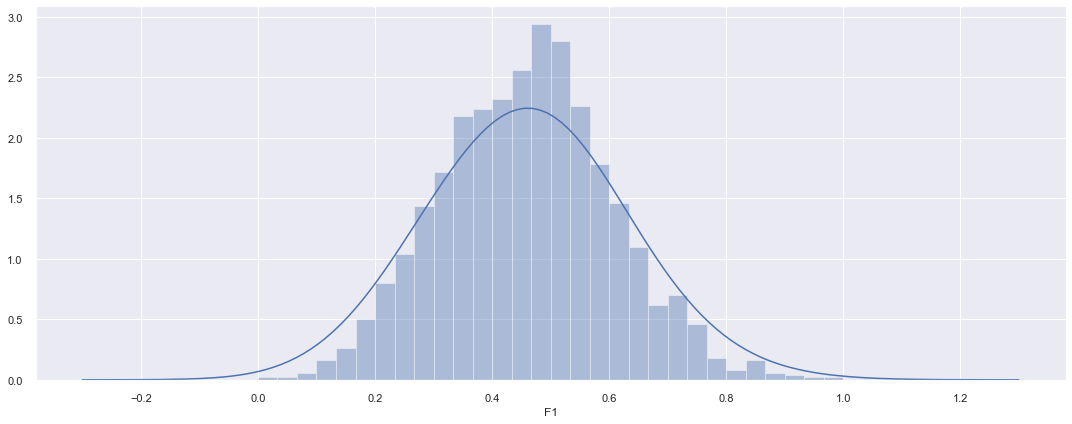

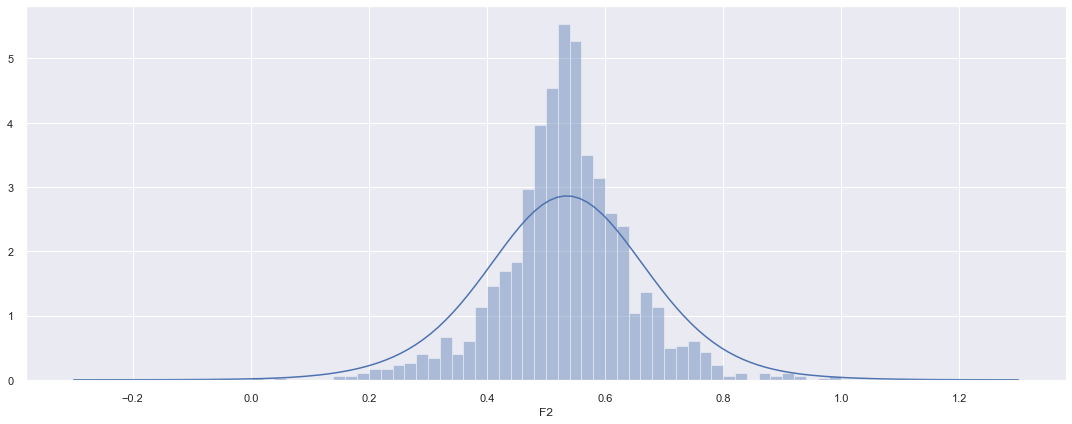

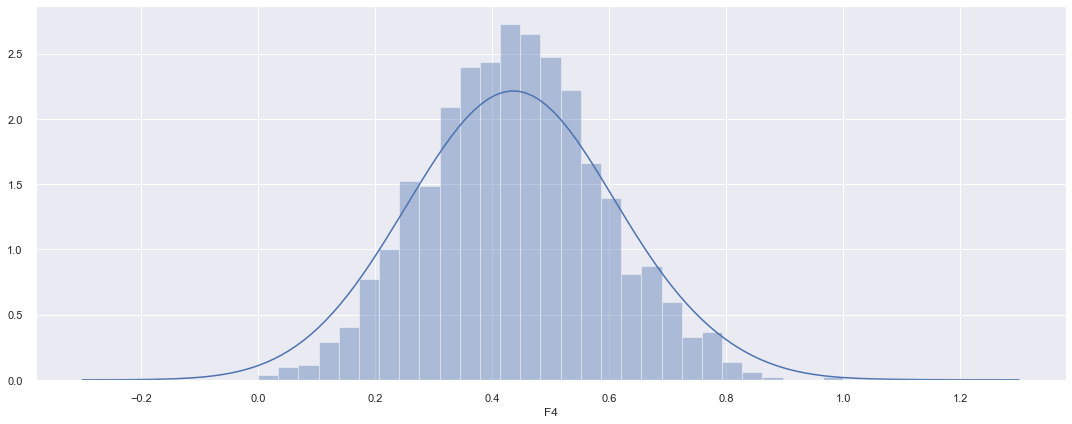

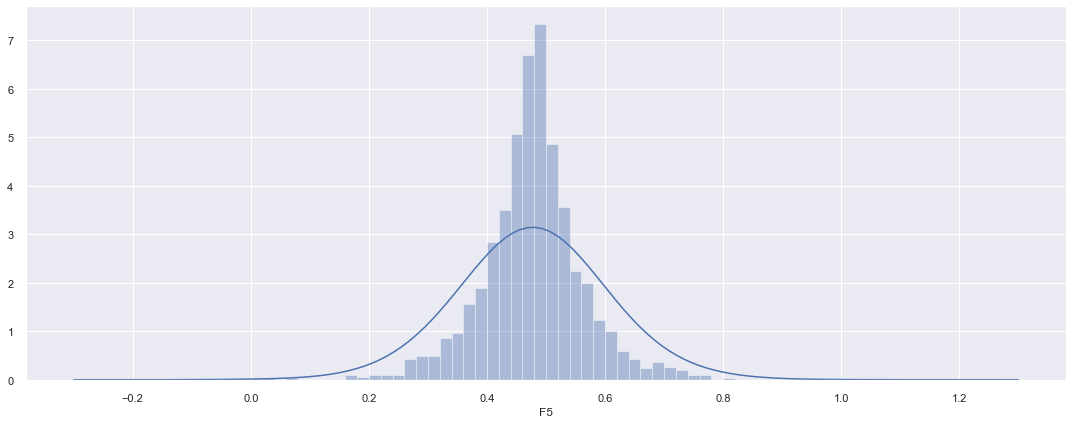

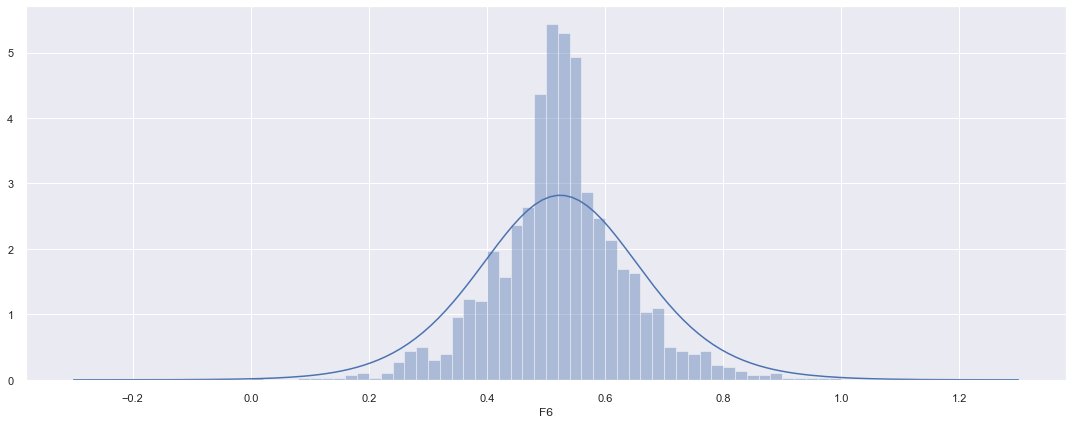

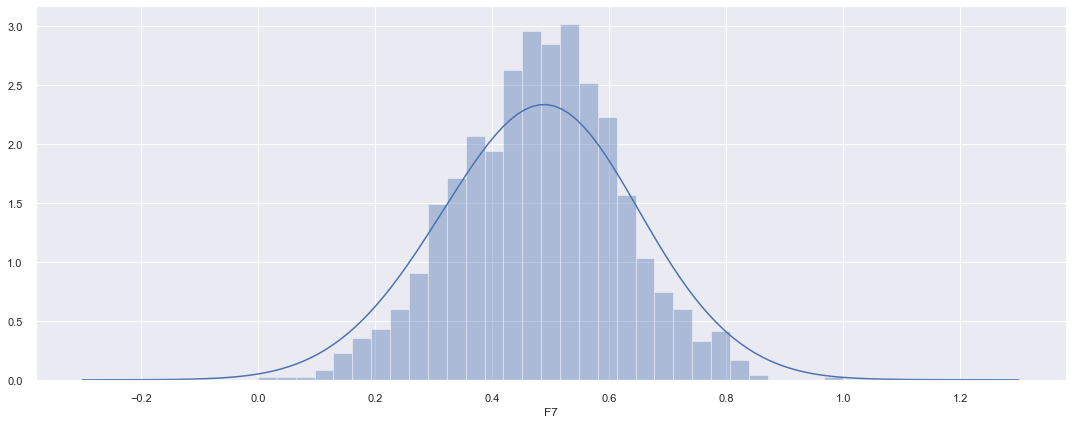

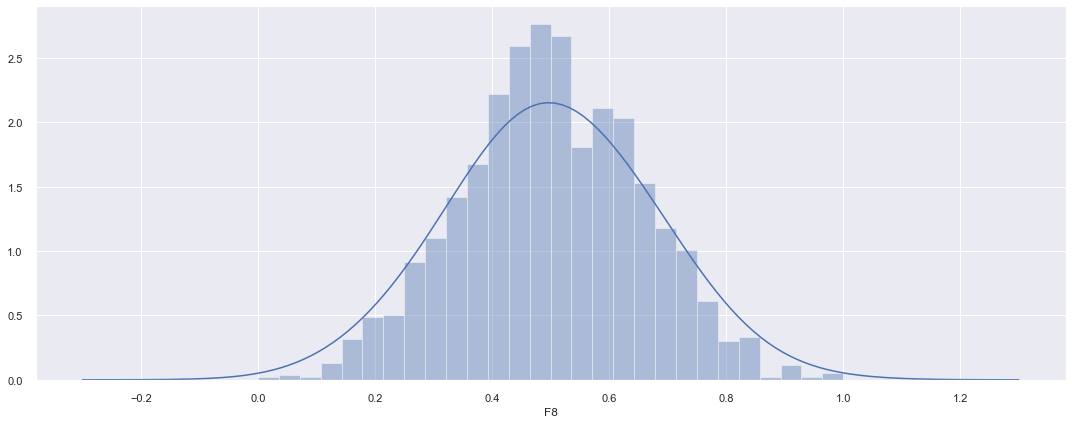

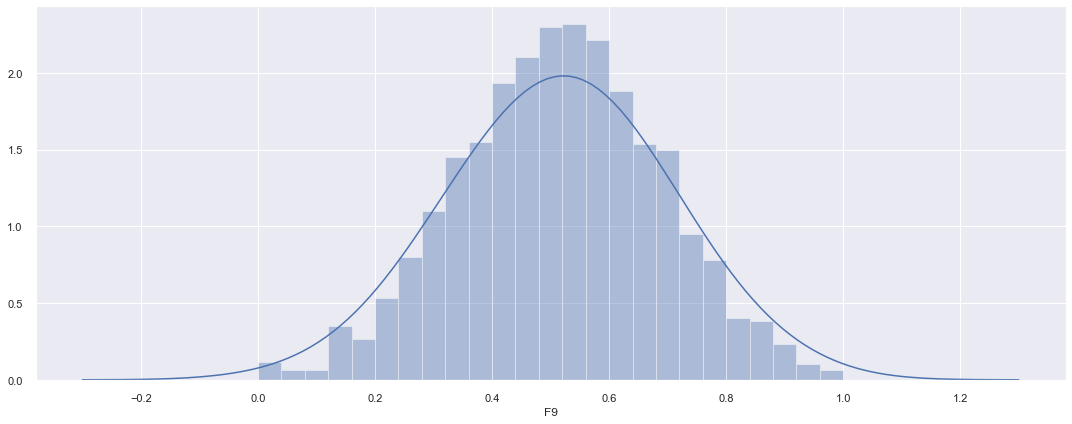

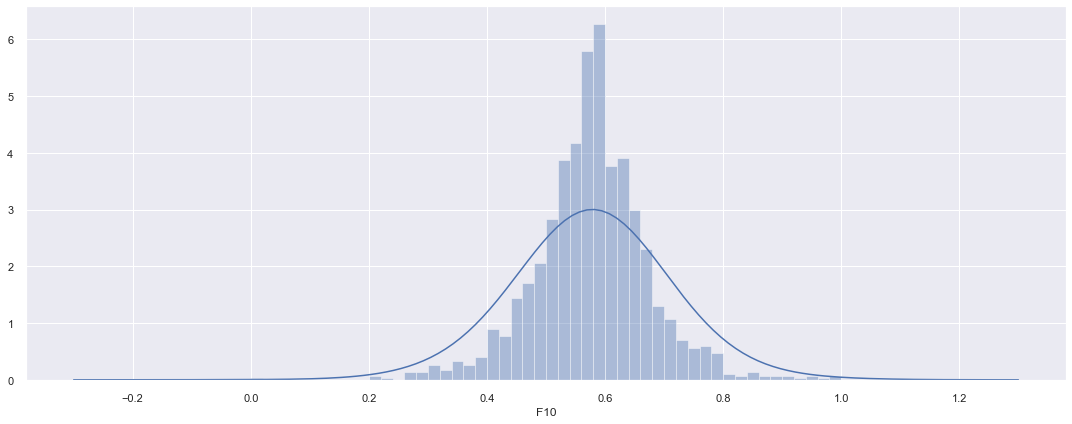

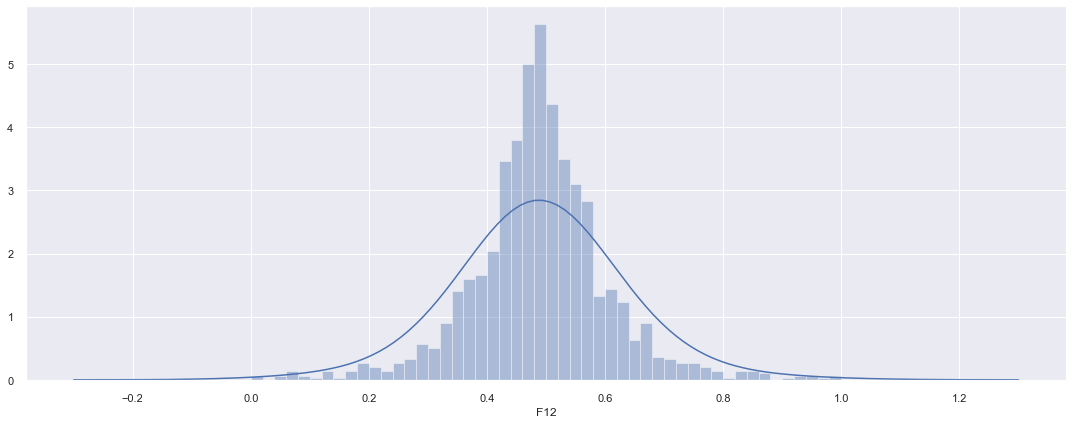

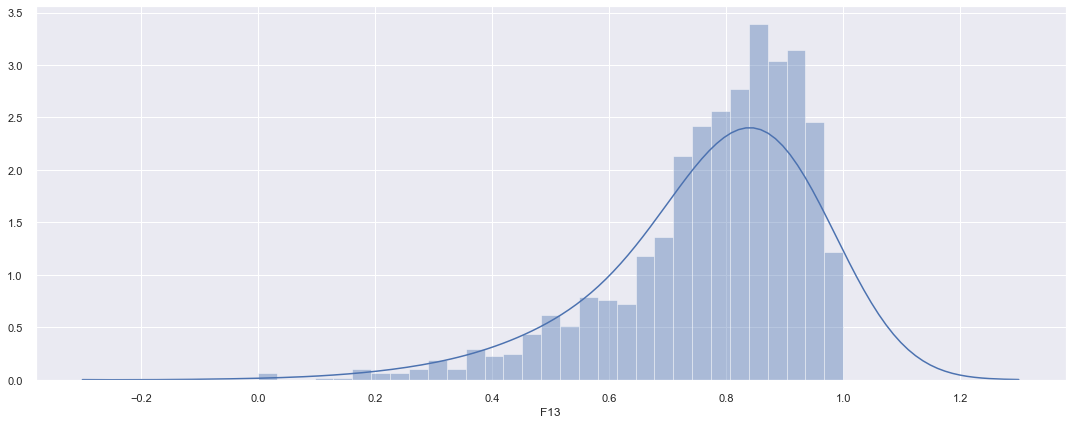

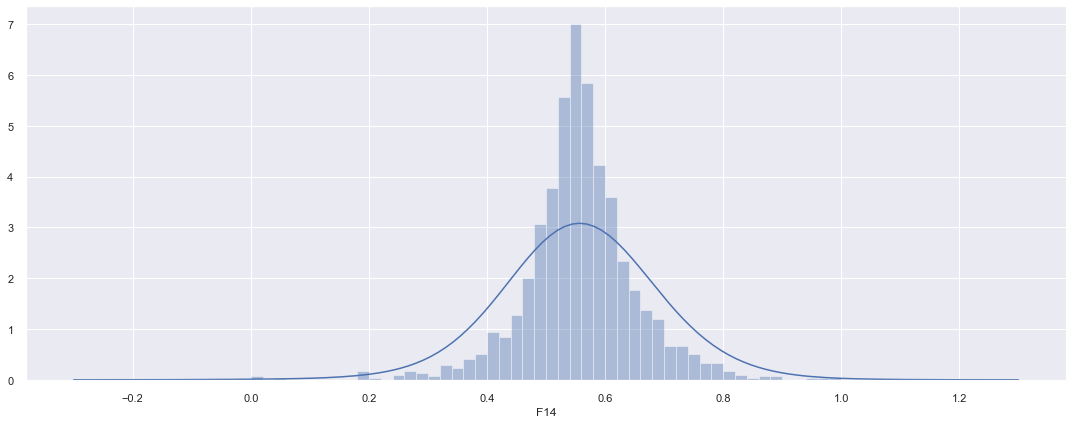

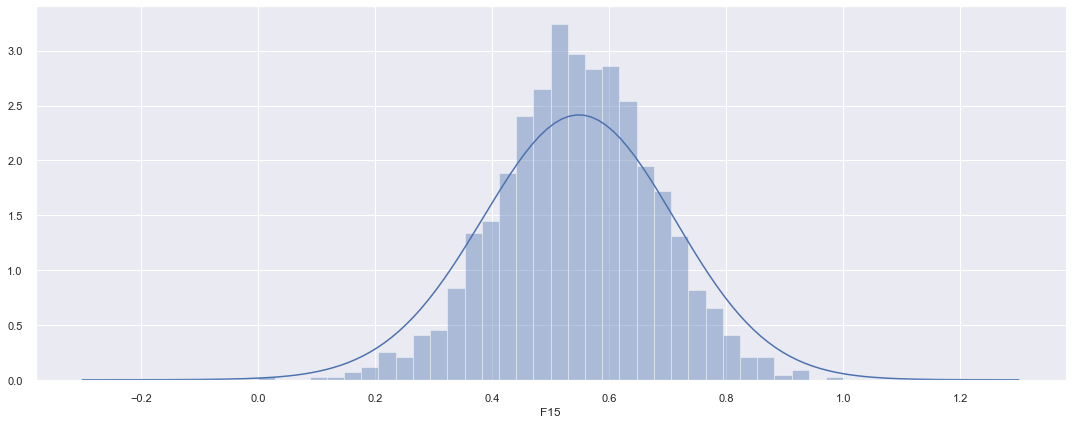

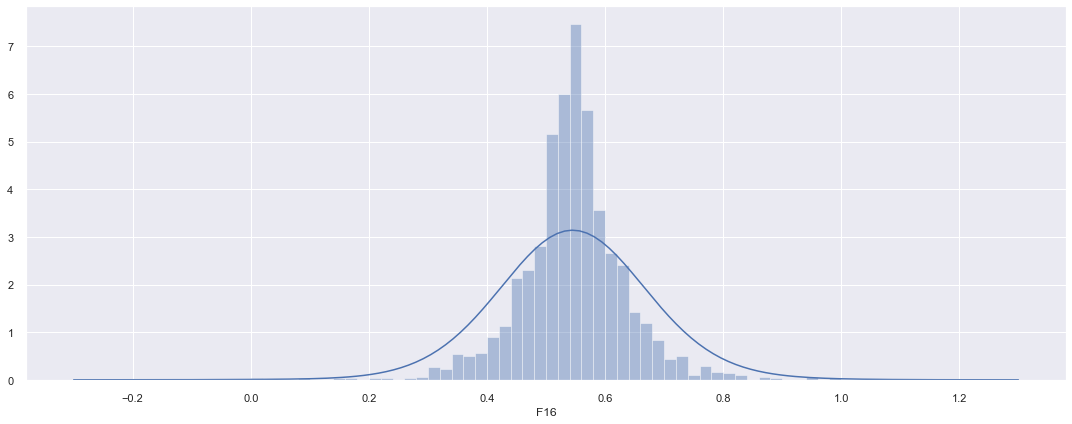

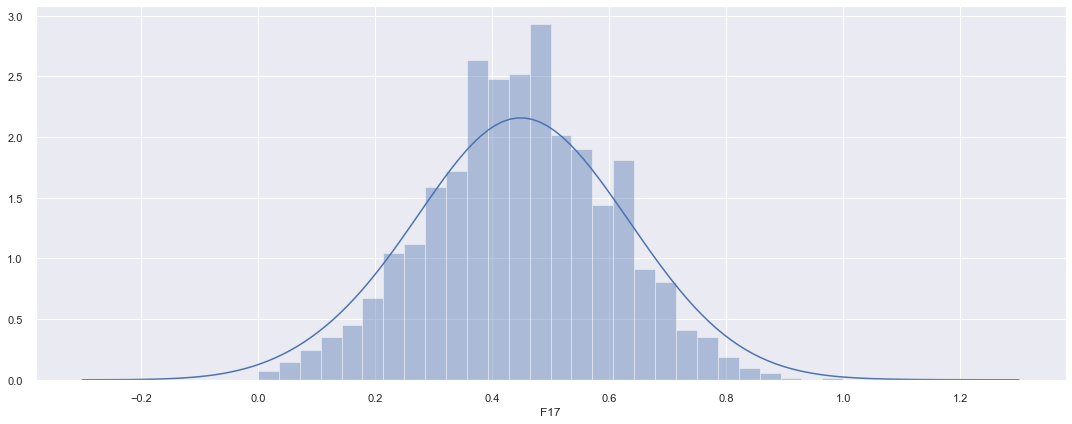

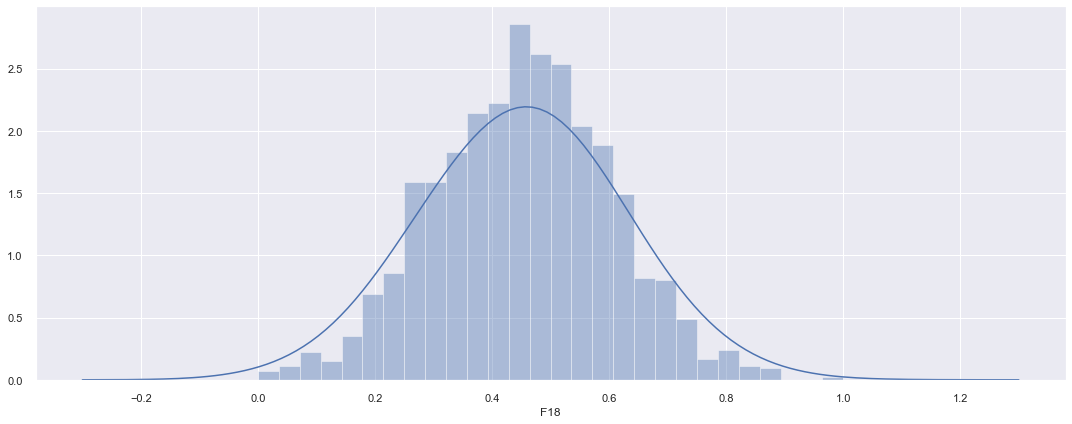

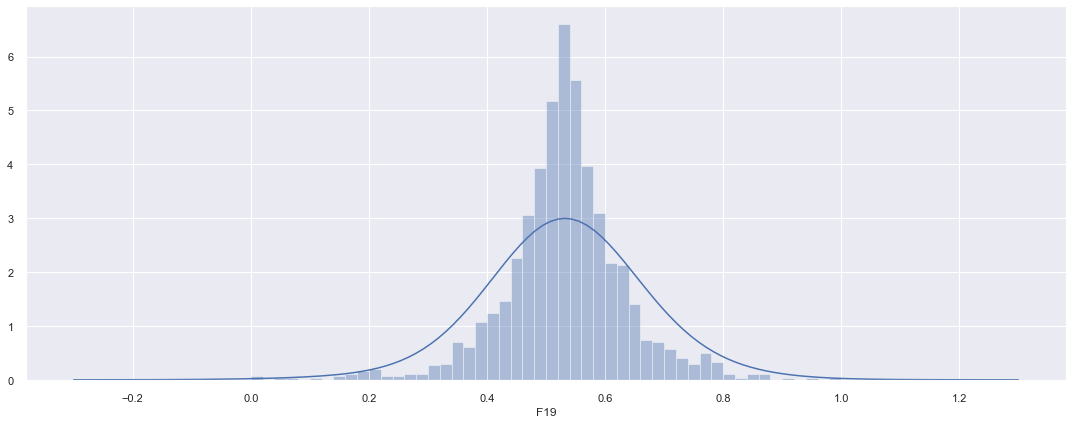

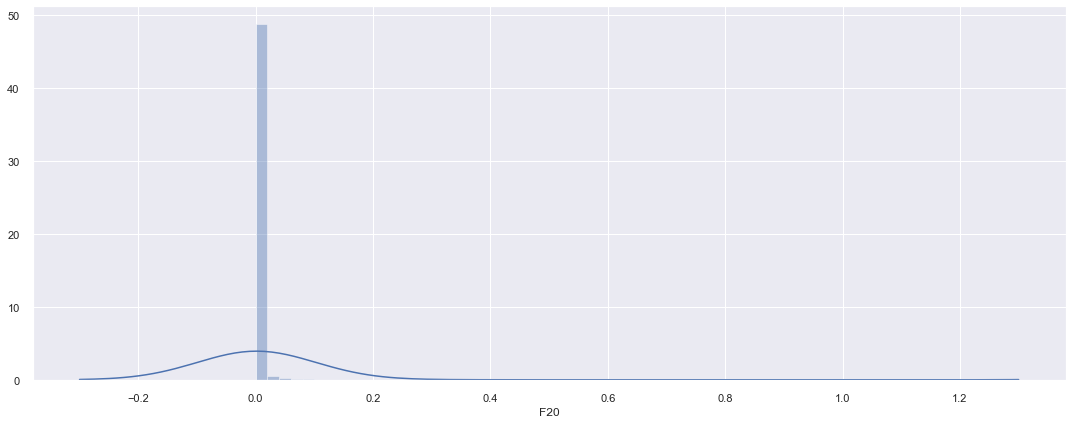

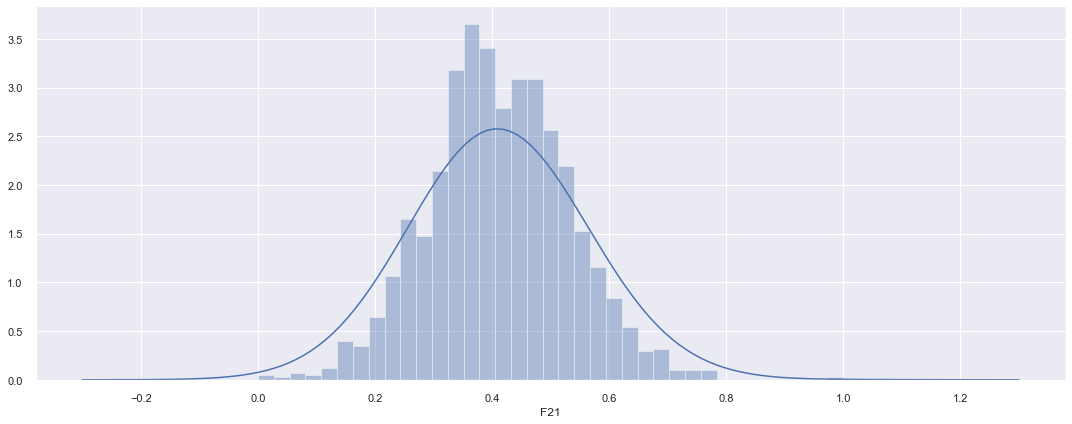

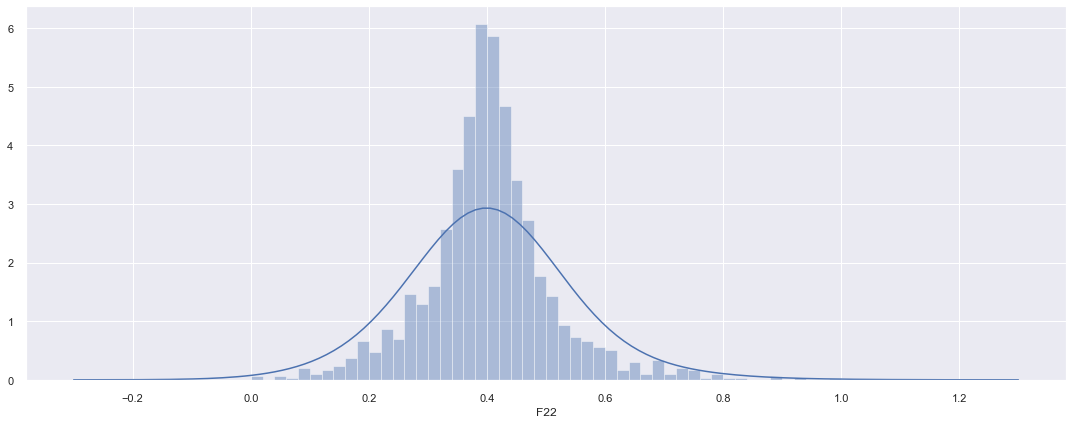

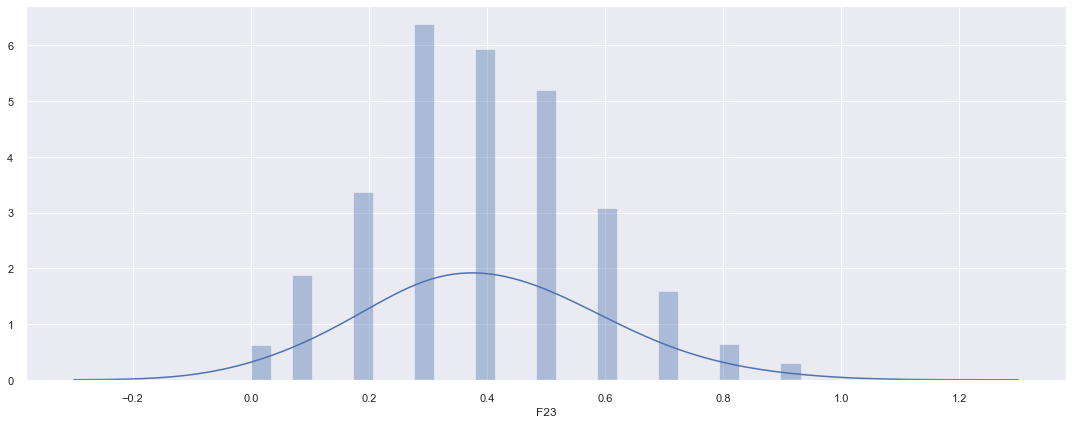

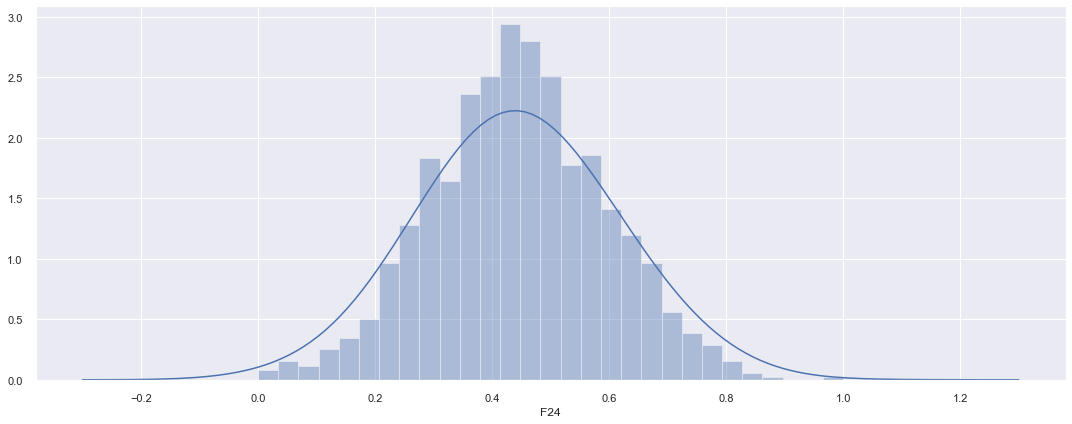

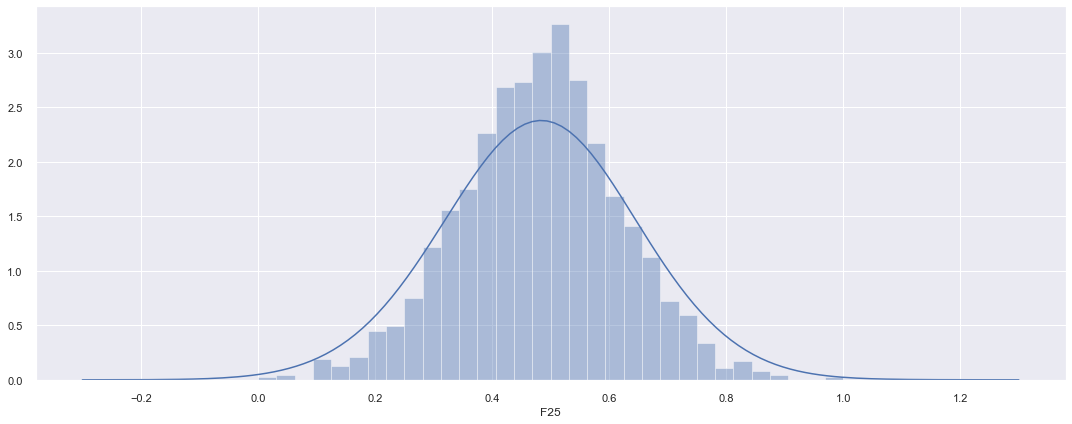

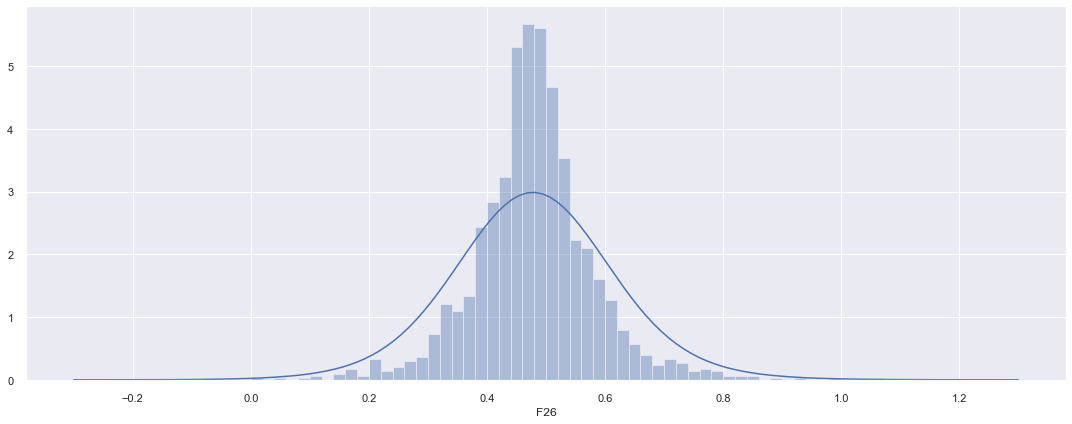

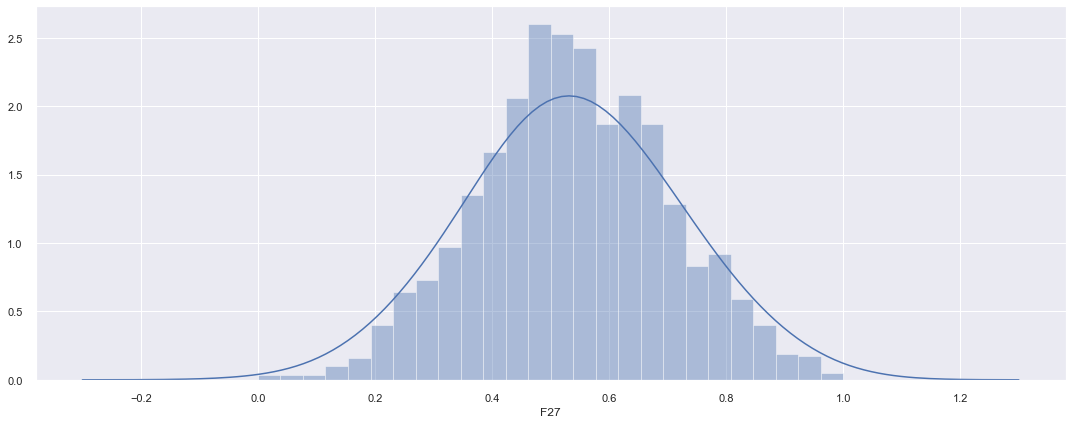

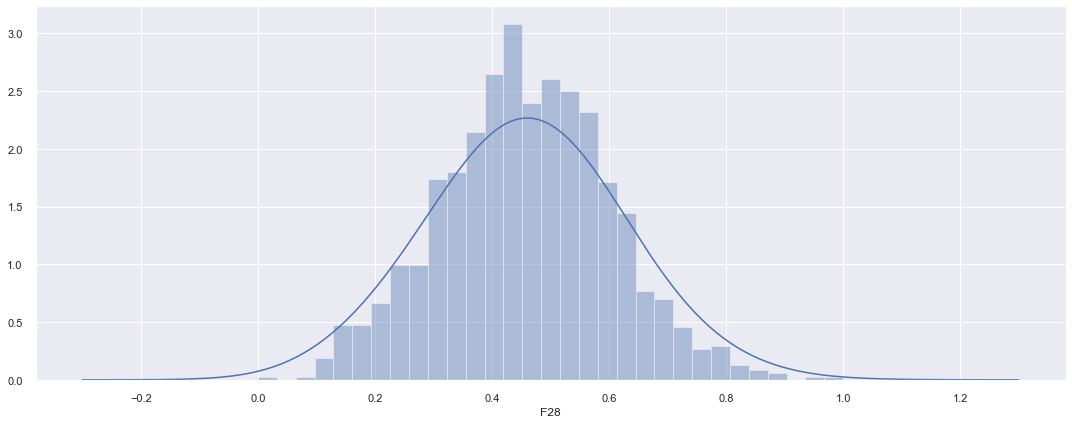

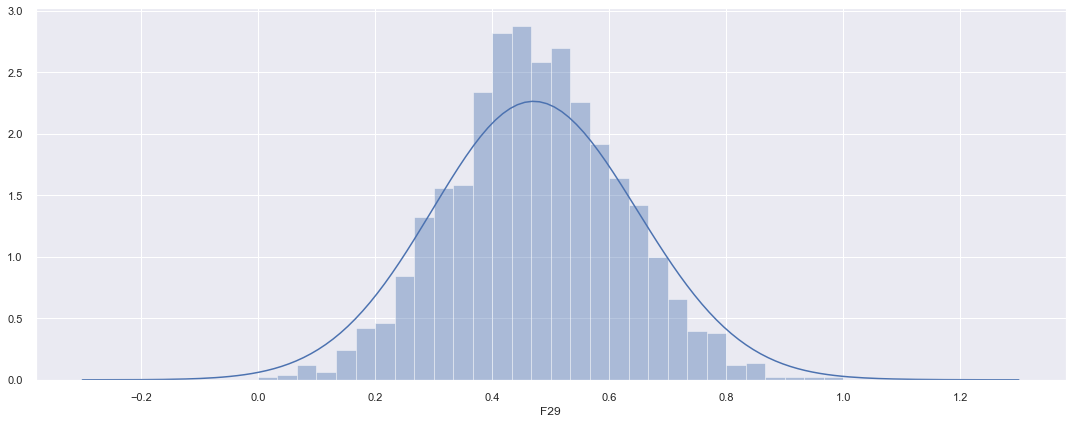

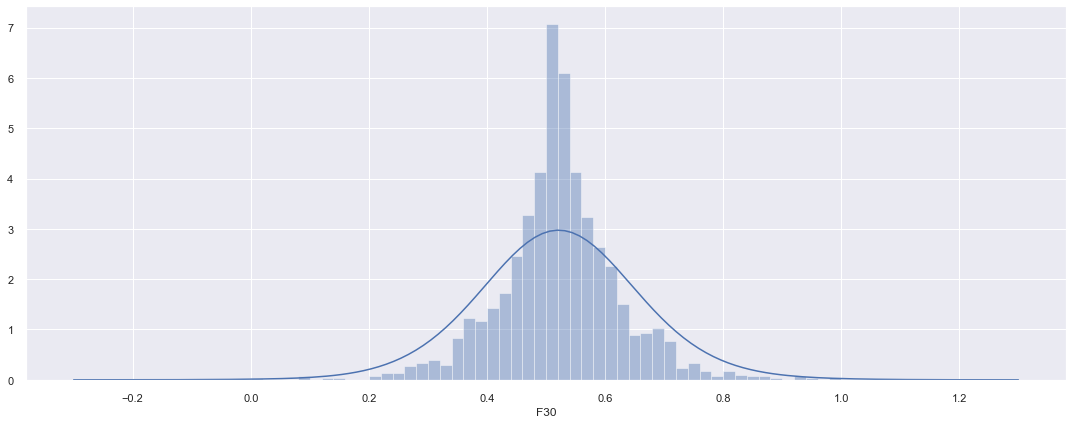

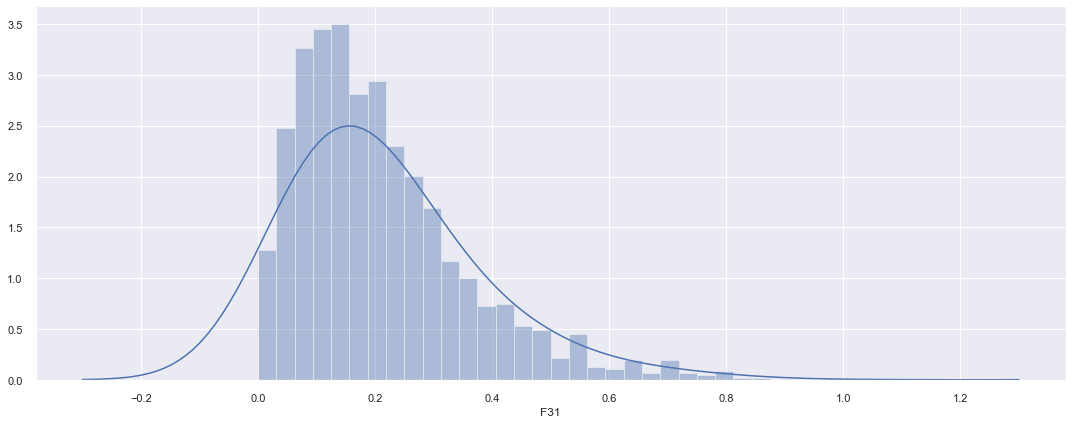

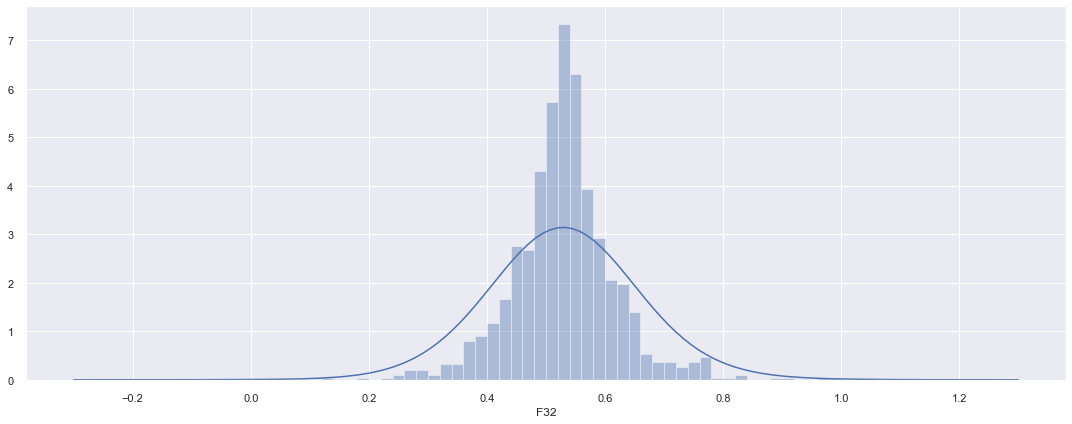

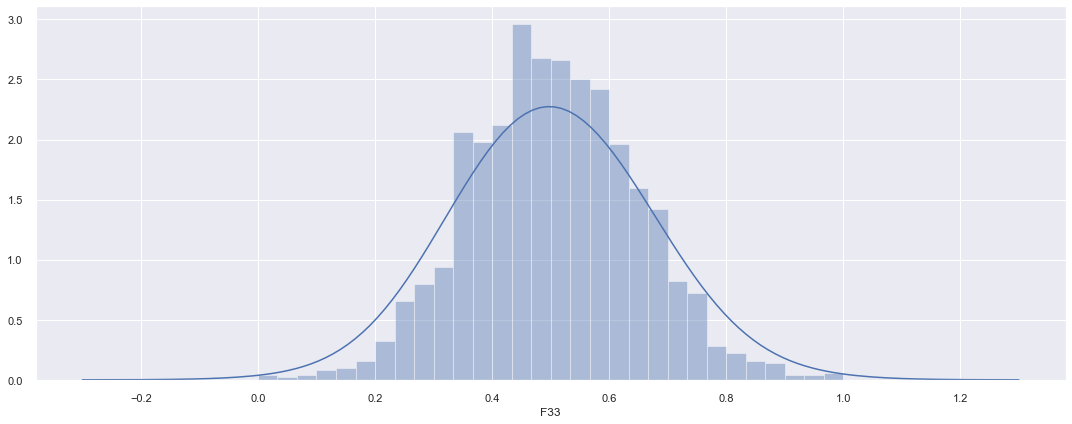

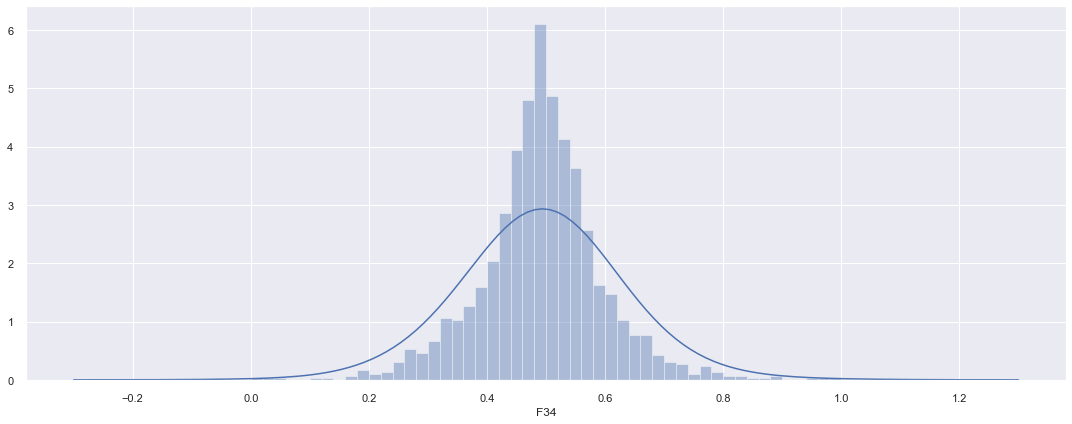

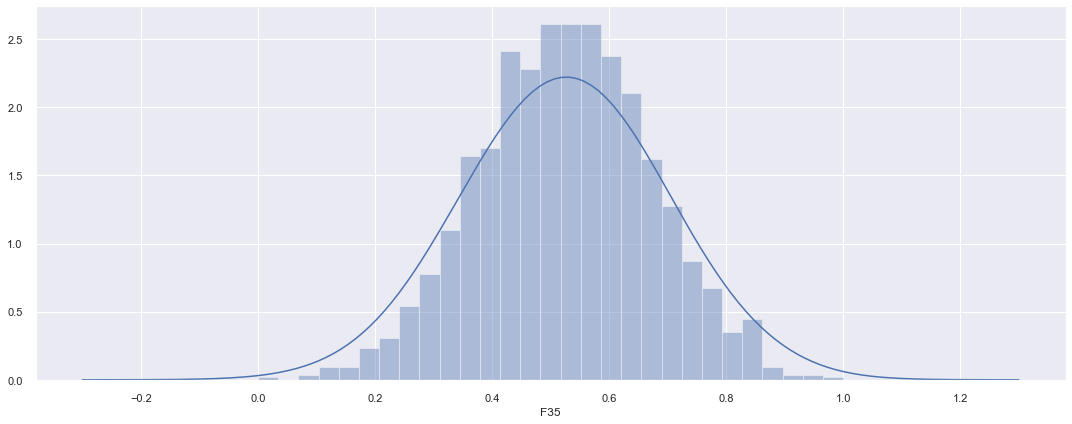

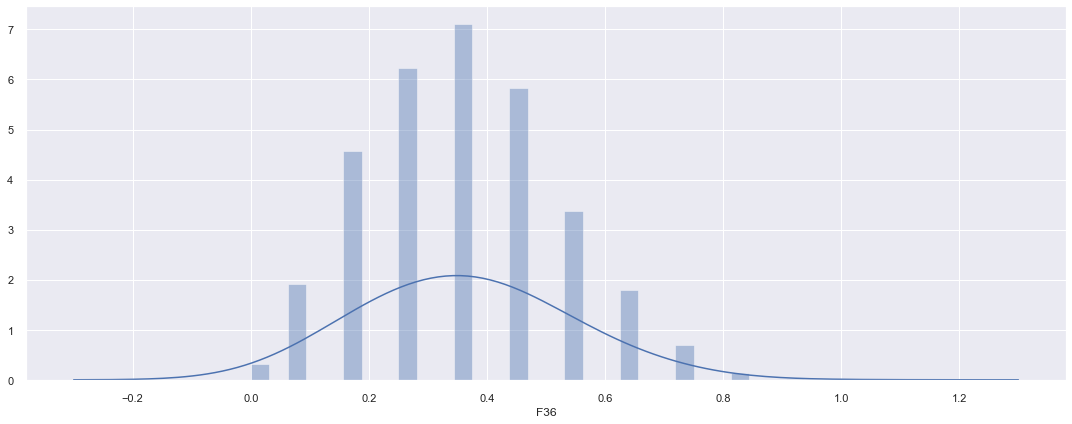

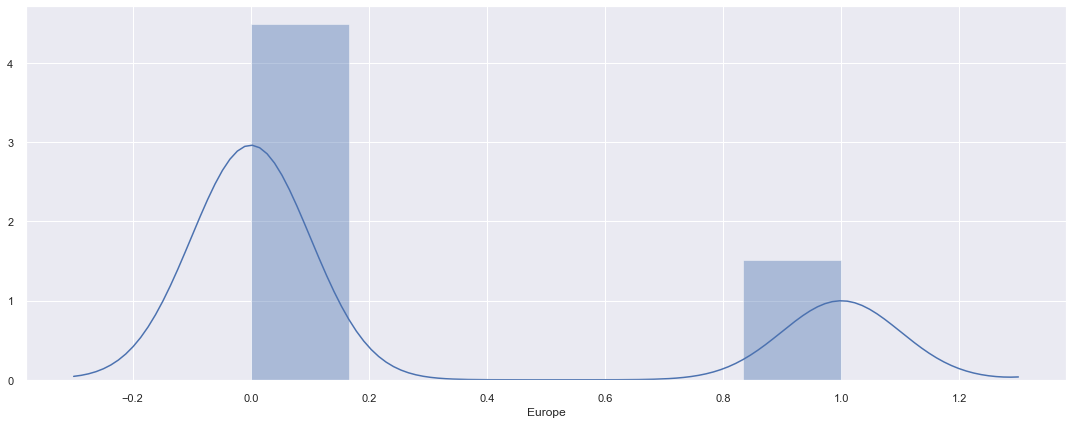

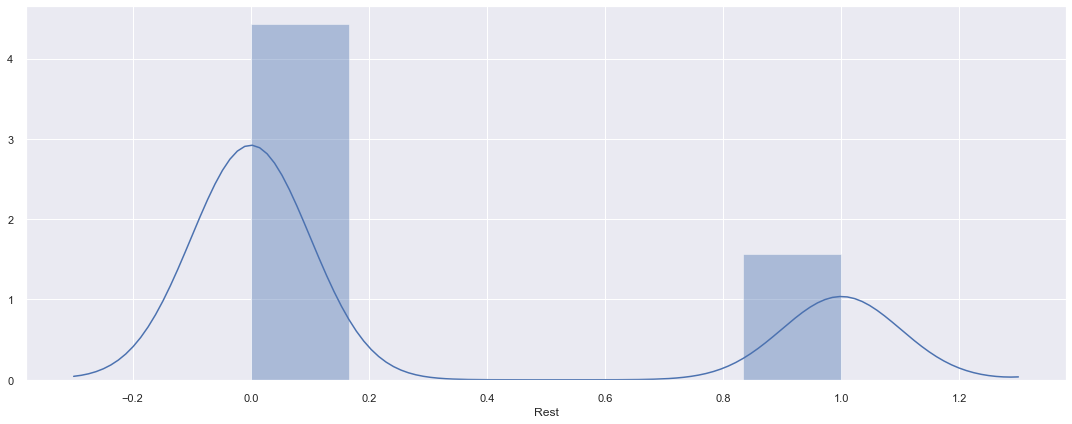

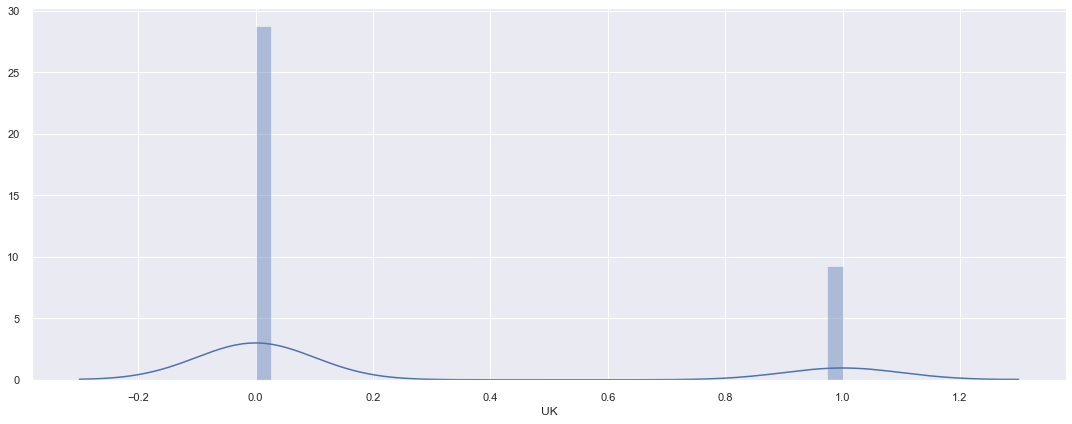

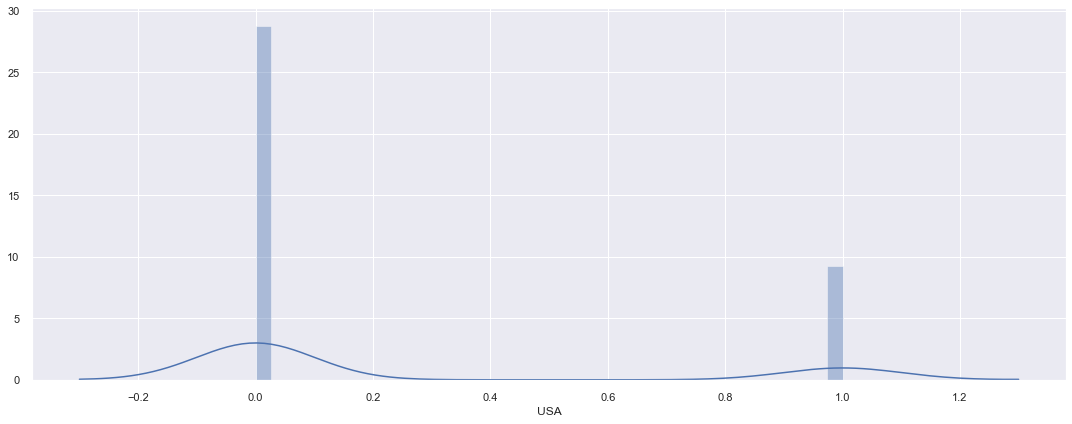

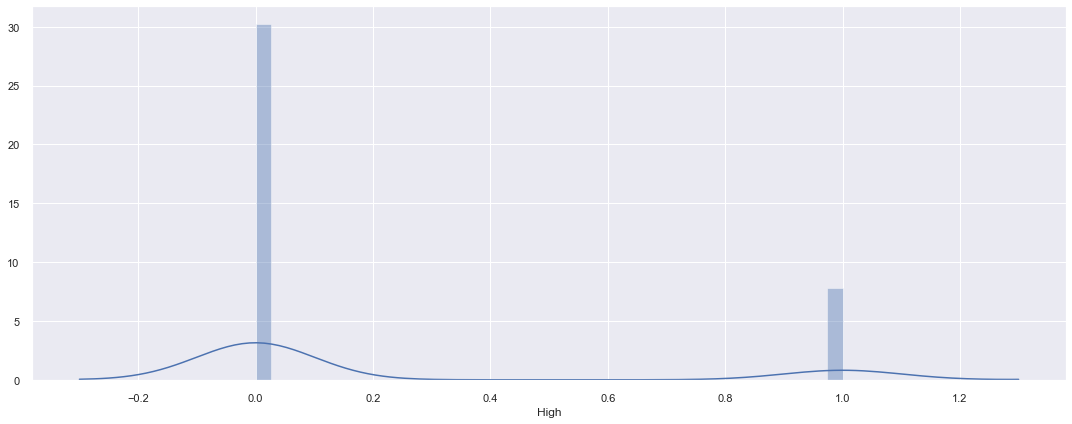

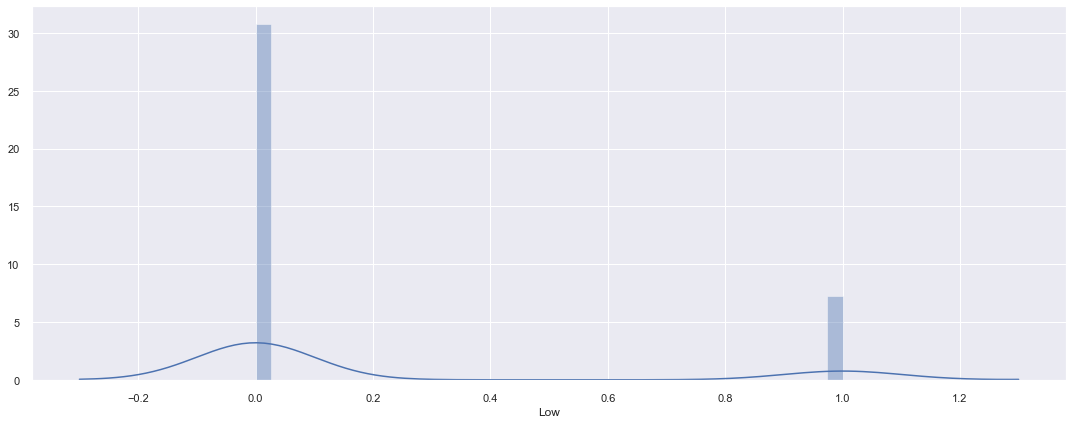

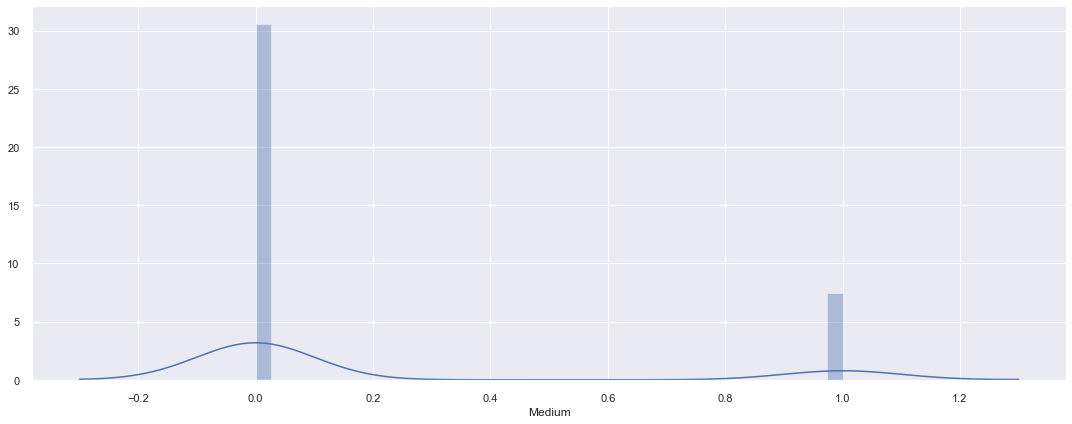

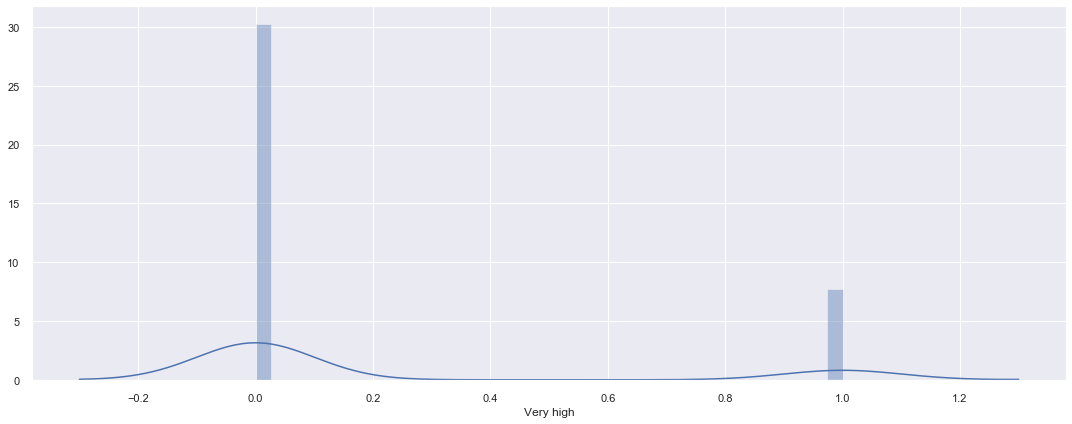

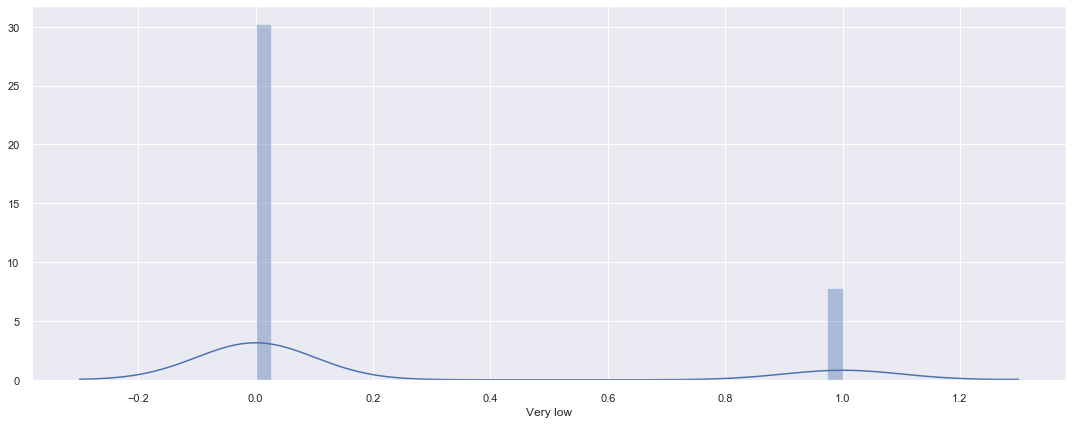

In [315]:
#inference about distribution: almost all features are equally right left and normally skewed
for column in df_data:
    plt.subplots(figsize=(15,6))
    sns.distplot(df_data[column],kde=True, kde_kws={'bw': 0.1})

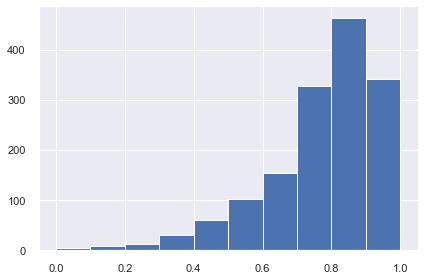

In [316]:
df_data["F13"].hist()

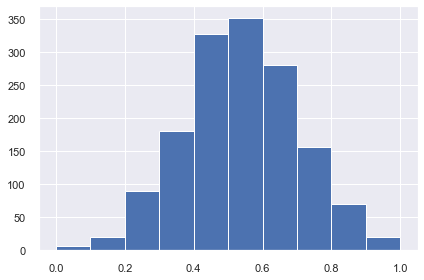

In [317]:
df_data["F27"].hist()

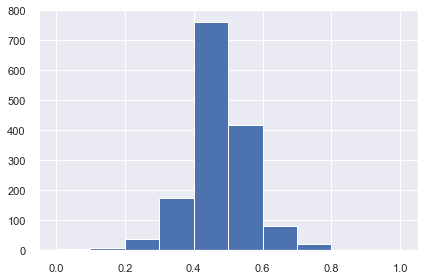

In [318]:
df_data["F5"].hist()

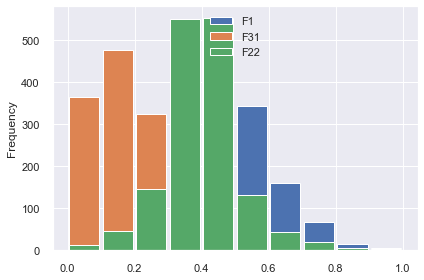

In [319]:
df_data[["F1", "F31", "F22"]].plot.hist(grid=True, rwidth=0.9)

plt.grid(axis='x', alpha=0.95)
plt.legend(loc='upper center')
plt.show()

In [320]:
df_data[["F30", "F31", "F34"]].duplicated().sum()

0

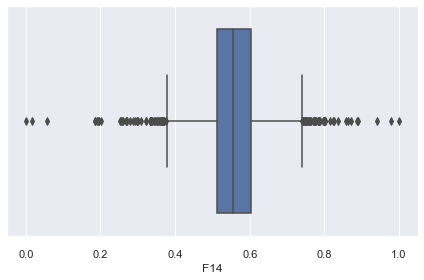

In [323]:
sns.boxplot(df_data["F14"]) 

In [324]:
Q1 = df_data.quantile(0.25)
Q3 = df_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

F1           0.196687
F2           0.113022
F4           0.199750
F5           0.084704
F6           0.113631
F7           0.189823
F8           0.210192
F9           0.234704
F10          0.103732
F12          0.113996
F13          0.185148
F14          0.090531
F15          0.172874
F16          0.084621
F17          0.206853
F18          0.206228
F19          0.098400
F20          0.000345
F21          0.158253
F22          0.104198
F23          0.200000
F24          0.198423
F25          0.179164
F26          0.101064
F27          0.221327
F28          0.188296
F29          0.193069
F30          0.102092
F31          0.179146
F32          0.086926
F33          0.195745
F34          0.108046
F35          0.199839
F36          0.181818
Europe       1.000000
Rest         1.000000
UK           0.000000
USA          0.000000
High         0.000000
Low          0.000000
Medium       0.000000
Very high    0.000000
Very low     0.000000
dtype: float64


In [325]:
for i in range(1, 22):
    if "F" + str(i) in df_data.columns:
        flooring = df_data["F" + str(i)].quantile(0.10)
        capping = df_data["F" + str(i)].quantile(0.90)
        df_data["F" + str(i)] = np.where(df_data["F" + str(i)] <flooring, flooring,df_data["F" + str(i)])
        df_data["F" + str(i)] = np.where(df_data["F" + str(i)] >capping, capping,df_data["F" + str(i)])
        print(df_data["F" + str(i)].skew())

-0.017364322738325527
0.002339827399679969
0.024061391646366132
-0.05077621997325447
-0.019948398303288515
-0.09437935472432724
0.017721840189102295
-0.03049821676459439
-0.0972381988526164
-0.005694966235214541
-0.5705514381703614
0.1361080604431296
-0.029683231737349162
0.034047264170812545
-0.03902507733888717
-0.042479102574465244
-0.022784563847537017
1.8330110350147244
0.014856031467945665


In [326]:
for i in range(1, 22):
    if "F" + str(i) in test_data.columns:
        flooring = test_data["F" + str(i)].quantile(0.10)
        capping = test_data["F" + str(i)].quantile(0.90)
        test_data["F" + str(i)] = np.where(test_data["F" + str(i)] <flooring, flooring,test_data["F" + str(i)])
        test_data["F" + str(i)] = np.where(test_data["F" + str(i)] >capping, capping,test_data["F" + str(i)])
        print(test_data["F" + str(i)].skew())

0.005299670235466312
-0.011207559190169417
0.02280840116356869
0.056314975958894835
-0.006072430613315937
-0.03313159769231372
-0.035174533917283306
0.03518889220134444
-0.007924542919978942
0.028619733906735355
-0.5250517088263108
0.09383047277830946
-0.04575721216404632
0.06539192656540076
-0.01093879803714105
0.001609851209255065
-0.14553894411017368
1.7838623298448044
0.02119495885026788


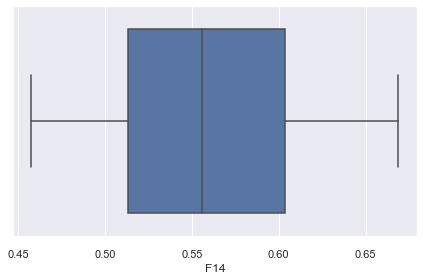

In [327]:
sns.boxplot(df_data["F14"]) 

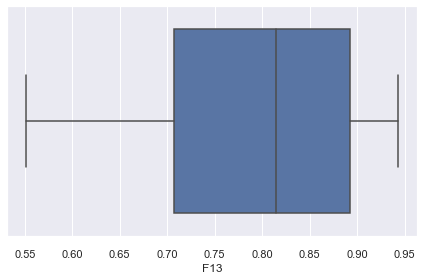

In [328]:
sns.boxplot(df_data["F13"])

In [329]:
df_data.head(3)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,0.629042,0.482979,0.63005,0.452963,0.548104,0.524386,0.530945,0.563399,0.600329,0.355735,...,0.454545,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.461973,0.567239,0.52850,0.455851,0.510941,0.431898,0.535054,0.630891,0.536494,0.454318,...,0.545455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.504729,0.625019,0.48300,0.480371,0.498316,0.651520,0.460416,0.709089,0.648205,0.380450,...,0.181818,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


***Train Test Splitting***

In [330]:
X = df_data

In [331]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(1050, 43) (1050,)
(450, 43) (450,)


# Training Model, Predicting & Testing Predictors

## 1. Linear Regression

In [332]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()

In [333]:
model_lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [334]:
pred_lr = model_lr.predict(xtest)

In [335]:
pred_lr

array([ 1348. , -1384. ,   -18. ,   828. ,  -588. ,  1336.5,  -721. ,
         986.5,  1265. ,  1370. ,  1096.5,   313.5,   363. ,    79. ,
        -653.5,  -248.5,  1453.5,   655. ,   273. ,   437.5,  1763.5,
         106. ,   604.5,   444.5, -1273. ,  2287. ,  2850. ,  1902. ,
         990. ,   588.5,  1171. ,  1128.5,  1167.5,    67. ,   733. ,
        2208. ,  1754. ,  1279. ,  1945. ,  1749. ,   724.5,   279.5,
        1749. ,  -104. ,   522. ,   344. ,  1629.5,  1411.5,    60. ,
        1584.5,   740. ,  2219. ,   121.5,  1658. ,  1026. ,  3716.5,
         484. ,  1458. ,  2071. ,   -82. , -1300.5,  2694. ,  2464. ,
        1303. ,  -736.5,  2231. ,   627.5,   -66. , -2266. ,  1723. ,
        2116.5,  1615.5,  2057. ,   259. ,    35.5,  -677. ,   750.5,
        1157. ,  -379.5,   277. ,  1417. ,  1765.5,   204. ,  1236. ,
         904. ,  1229. ,    34. ,  2627.5,  -647.5,  2780.5,  -747. ,
        1325.5,    83. ,  1526.5,  -673. , -1231. ,   300. ,   783.5,
        1142.5,   79

In [336]:
xtest.head(10)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
1495,0.303301,0.404143,0.63005,0.376644,0.607504,0.416506,0.610587,0.606402,0.488383,0.452652,...,0.181818,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
657,0.310153,0.664981,0.42900,0.520101,0.482021,0.651520,0.615275,0.569139,0.665102,0.567898,...,0.363636,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1033,0.327671,0.533479,0.39400,0.574168,0.470848,0.384392,0.679536,0.477457,0.598686,0.521244,...,0.363636,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
415,0.406814,0.664981,0.50250,0.511141,0.400164,0.620294,0.702981,0.514128,0.559024,0.453207,...,0.727273,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1379,0.437699,0.546168,0.35150,0.476889,0.388221,0.525340,0.411430,0.530597,0.460925,0.498473,...,0.363636,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1195,0.472590,0.461420,0.41150,0.376644,0.657401,0.482723,0.455412,0.554219,0.532739,0.619633,...,0.454545,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1416,0.491844,0.460395,0.31700,0.554384,0.657401,0.350225,0.584514,0.500983,0.616522,0.586504,...,0.545455,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1315,0.455603,0.497334,0.57650,0.569618,0.552458,0.495212,0.301101,0.328484,0.462333,0.355735,...,0.363636,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1301,0.469646,0.664981,0.46850,0.504106,0.638368,0.434941,0.624967,0.564751,0.549167,0.355735,...,0.636364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
228,0.360197,0.404143,0.33550,0.474987,0.474463,0.554692,0.508138,0.737139,0.545881,0.522355,...,0.363636,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [337]:
model_lr.coef_

array([-9.44072435e+01, -3.63662422e+02,  3.63698665e+01, -1.58576753e+02,
       -3.08621866e+02,  8.51257351e+01, -1.42503500e+02, -2.94506061e+01,
        1.57772595e+02,  2.16942101e+02,  4.43500805e+03, -1.01338133e+02,
       -3.92298135e+03,  2.73649619e+02,  1.18565248e+02, -2.08746438e+03,
       -2.92196534e+02,  5.37720177e+05,  2.52364560e+02,  1.06110527e+02,
       -1.14710141e+03, -2.29848896e+01, -6.17877487e+01, -1.82963046e+02,
        3.79446975e+00, -4.82814827e+02, -3.56038739e+01,  1.32290616e+01,
       -4.25628171e+02,  1.93905049e+02,  1.15398593e+01, -6.21845400e+00,
       -1.39053503e+02, -2.55299166e+03, -2.16837986e+14, -2.16837986e+14,
       -2.16837986e+14, -2.16837986e+14, -3.13585674e+15, -3.13585674e+15,
       -3.13585674e+15, -3.13585674e+15, -3.13585674e+15])

In [338]:
model_lr.intercept_

3352694728259444.0

In [339]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, pred_lr)

483.7999333333333

In [340]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, pred_lr)

377547.33299400005

In [341]:
RMSEValues = {}

In [342]:
rmse = mean_squared_error(ytest, pred_lr, squared=False)
rmse

614.4488042091058

In [343]:
RMSEValues['Linear Regression'] = rmse

In [344]:
from sklearn.metrics import median_absolute_error
median_absolute_error(ytest, pred_lr)

396.105

### **Checking r2 by sklearn metric**

R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [345]:
from sklearn.metrics import r2_score
test_r2 = r2_score(ytest,pred_lr)
test_r2

0.7458828517529552

In [346]:
pred_train = model_lr.predict(xtrain)
train_r2 = r2_score(ytrain,pred_train)

In [347]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )

R2 score for testing: 0.7458828517529552
R2 score for training: 0.7696905561251927


In [348]:
r_2 = []
for i in range(1, (xtest.shape[-1])+1):
    m=LinearRegression()
    m.fit(xtrain.values[:,:i], ytrain)
    prd=m.predict(xtest.values[:,:i])
    r_2.append(r2_score(ytest,prd))

Text(0, 0.5, 'R_2 Score')

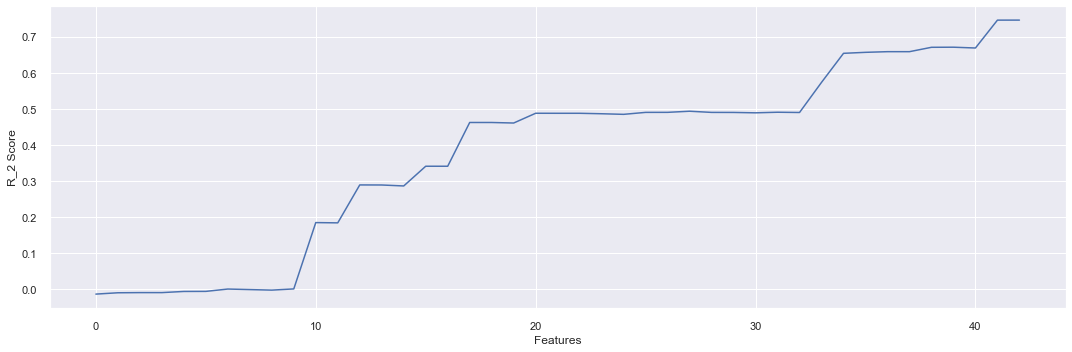

In [349]:
plt.figure(figsize=(15,5))
plt.plot(r_2);
plt.xlabel('Features')
plt.ylabel('R_2 Score')

### Adjusted R2 Calculation

In [350]:
def adjR2 (xtest,ytest,r2):
    n = len(ytest)
    k = xtest.shape[-1]
    adj_r2 = 1 - ((1 - r2)*(n - 1)) / (n - k -1)
    print('The adjusted R2 is:', adj_r2)


In [351]:
adjR2(xtest,ytest,test_r2)

The adjusted R2 is: 0.7189689665937855


**Ploting Residual Plots**

A residual is the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The ResidualsPlot Visualizer shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

If the points are randomly dispersed around the horizontal axis, a linear regression model is usually well-suited for the data; otherwise, a non-linear model is more appropriate.

In [352]:
# !pip install yellowbrick == 0.9.1

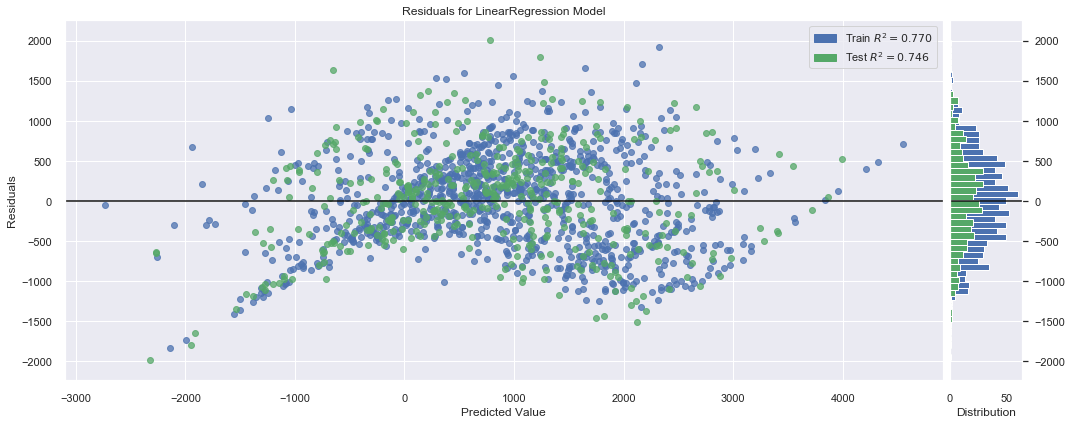

In [353]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15,6))

visualizer = ResidualsPlot(model_lr,hist=True)
visualizer.fit(xtrain.values, ytrain.values)  
visualizer.score(xtest.values, ytest.values)  
visualizer.poof();

##  Recursive Feature Elimination
The sklearn package has several feature selection methods. Here are using the recursive feature elimination method. This process starts with all variables and assigns weights to them. Those with small weights are first removed. The remaining variables are used to refit the model and the process repeats. 

In [354]:
from sklearn.feature_selection import RFE

In [355]:
lrm = LinearRegression()

In [356]:
# recursive feature elimination with cross validation, using r-squared as metric
rfe = RFE(estimator=lrm, step=3, n_features_to_select = 25)

rfe.fit(X, y.values)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=3, verbose=0)

In [357]:
X.columns

Index(['F1', 'F2', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F12', 'F13',
       'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'F23',
       'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31', 'F32', 'F33',
       'F34', 'F35', 'F36', 'Europe', 'Rest', 'UK', 'USA', 'High', 'Low',
       'Medium', 'Very high', 'Very low'],
      dtype='object')

In [358]:
rfe.ranking_

array([5, 3, 6, 4, 1, 6, 1, 2, 1, 1, 1, 7, 1, 1, 7, 1, 1, 1, 3, 7, 1, 3,
       6, 1, 4, 1, 4, 1, 1, 5, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1])

In [359]:
rfe.support_

array([False, False, False, False,  True, False,  True, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False,  True,  True, False,  True,  True, False,
        True,  True,  True,  True, False,  True,  True])

In [360]:
feature_name = np.array(X.columns)

In [361]:
list(feature_name[rfe.support_])

['F6',
 'F8',
 'F10',
 'F12',
 'F13',
 'F15',
 'F16',
 'F18',
 'F19',
 'F20',
 'F23',
 'F26',
 'F28',
 'F30',
 'F31',
 'F33',
 'F34',
 'F36',
 'Europe',
 'UK',
 'USA',
 'High',
 'Low',
 'Very high',
 'Very low']

In [362]:
# print the optimal number of feature
print("Optimal number of features : %d" % rfe.n_features_)

# save the selected features
feature_cols_selected = list((feature_name)[rfe.support_])
print("Features selected: " + str(feature_cols_selected))

Optimal number of features : 25
Features selected: ['F6', 'F8', 'F10', 'F12', 'F13', 'F15', 'F16', 'F18', 'F19', 'F20', 'F23', 'F26', 'F28', 'F30', 'F31', 'F33', 'F34', 'F36', 'Europe', 'UK', 'USA', 'High', 'Low', 'Very high', 'Very low']


Once the features to include are selected, we can use them to fit the model. While the scaled features were used in the RFE step above, we'll use the original values for fitting the model. This way we don't have to tranform the data when making predictions.

In [363]:
xtrain_new = xtrain[list(feature_name[rfe.support_])]
xtest_new = xtest[list(feature_name[rfe.support_])]
print(xtrain_new.shape)
print(xtest_new.shape)

(1050, 25)
(450, 25)


In [364]:
print(ytrain.shape)
print(ytest.shape)

(1050,)
(450,)


In [365]:
lm2 = LinearRegression()
lm2.fit(xtrain_new, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [366]:
pred_new=lm2.predict(xtest_new)

In [367]:
# print the R-squared
print("The R-squared value is: {0:0.4f} \n".format(r2_score(ytest, pred_new)))

The R-squared value is: 0.7534 



## The R-squared value of linear regression: is: 0.7534  

**Adjusted r2**

In [368]:
adjR2(xtest_new,ytest,r2_score(ytest, pred_new))

The adjusted R2 is: 0.7388664201909163


**Cross Validation**

In [369]:
from sklearn.model_selection import cross_val_score

In [370]:
scores = cross_val_score(lm2, xtrain_new, ytrain, cv=10)

In [371]:
print(scores)

[0.76800028 0.72443692 0.78848545 0.74410315 0.7736224  0.7471968
 0.78781344 0.70303483 0.77869255 0.72782583]


In [372]:
print(scores.mean())

0.7543211640050635


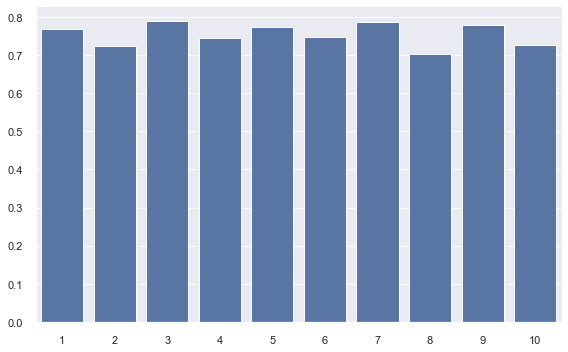

In [373]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(range(1,len(scores)+1)),y=scores, color='b')
plt.show()

**To conclude this we can remove features and adjusted R2 can be increased/descreased.**

## 2.Decision Tree Regressor 

In [374]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)
# Predict

result = regr.predict(xtest)
print(result)

[ 822.50024017 -103.96068681 1625.55344468 1625.55344468 -103.96068681
 1625.55344468 -103.96068681 1625.55344468  822.50024017  822.50024017
  822.50024017  840.38592965 1625.55344468 -103.96068681 -103.96068681
  822.50024017 -103.96068681 1625.55344468  822.50024017 -103.96068681
  822.50024017 1625.55344468 -103.96068681 1625.55344468 -103.96068681
 1625.55344468 1625.55344468  840.38592965  840.38592965 -103.96068681
  822.50024017 -103.96068681 1625.55344468 -103.96068681  840.38592965
  840.38592965  822.50024017  840.38592965 1625.55344468  822.50024017
  822.50024017  840.38592965 1625.55344468 1625.55344468 -103.96068681
 1625.55344468 1625.55344468 1625.55344468 1625.55344468  822.50024017
  822.50024017 1625.55344468  840.38592965  822.50024017 -103.96068681
 1625.55344468 1625.55344468  822.50024017 1625.55344468 -103.96068681
 -103.96068681  822.50024017  822.50024017 1625.55344468  840.38592965
 1625.55344468 1625.55344468  822.50024017 -103.96068681  822.50024017
 1625.

Root Mean Square Error (RMSE) measures how much error there is between two data sets. In other words, it compares a predicted value and an observed or known value. The smaller an RMSE value, the closer predicted and observed values are.

In [375]:
mean_squared_error(ytest, result)

1088881.795264997

In [376]:
mean_squared_error(ytest, result, squared=False)

1043.4949905318172

In [377]:
RMSEValues['Decision Tree Regressor'] =  np.sqrt(mean_squared_error(ytest, result))

## 3.Support Vector Machine [SVM] 

In [378]:
from sklearn.svm import SVR

# Fit regression model
svr = SVR().fit(X, y)
# Predict
pred_svm = svr.predict(xtest)


In [379]:
pred_svm

array([656.04379895, 574.11964357, 623.78589242, 641.9960639 ,
       594.51608453, 628.07275559, 624.84209366, 637.89042448,
       662.49689302, 651.64417117, 604.48173749, 646.79866011,
       613.18291133, 651.722935  , 655.35428973, 626.78959661,
       629.42977497, 649.35609178, 602.28351037, 612.26594511,
       653.15705784, 605.79185369, 615.61844656, 580.30138548,
       607.22406072, 635.47678461, 629.12265923, 653.41976226,
       649.72192281, 625.60286619, 655.50284973, 640.46265903,
       631.06088436, 614.59794293, 635.9259255 , 667.97245264,
       635.94482314, 638.16498667, 615.48439824, 656.96998201,
       626.74189841, 641.98548686, 653.82492787, 599.93784869,
       617.1445065 , 580.83027384, 640.14681701, 656.37446806,
       600.29948019, 654.85973759, 628.58680854, 627.43206057,
       638.14278497, 603.14075867, 656.31460654, 661.03804908,
       609.18733341, 652.18866629, 662.91975332, 656.03059033,
       595.89297952, 659.94184053, 654.6214372 , 632.63

In [380]:
mean_squared_error(ytest, pred_svm)

1473255.1699755907

In [381]:
mean_squared_error(ytest, pred_svm, squared=False)

1213.7772324341854

In [382]:
RMSEValues['Support Vector Machine [SVM]'] =  np.sqrt(mean_squared_error(ytest, pred_svm))

## 4.Random Forest Regressor 

In [383]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=43, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X, y)
print(rfr.predict(xtest))

[ 95.29722479 115.94783096 110.42061077 115.49633778 111.53636734
 118.87878674 120.95353155 112.67304384 125.50848168  95.28120605
 119.37387521 123.82636923 120.31731408 125.998458   121.7812972
 114.78260993  83.0256525  123.96997579 124.97194748 112.92687302
 121.09142205  96.71558331 124.7284808  126.42015129 123.96996754
  87.10381708 112.85520133  94.51607731 126.15645897 122.43178696
  92.38519771 105.7681437  102.05635482 107.25548695 126.9549042
 110.69034594 103.30326218 122.65328642 124.49801308 120.42307668
 101.29955768 104.44014756 121.39185581  92.91317073 112.8458628
 125.95002353 111.20721997 121.38075762 124.42875827 124.03974739
 106.42192733 112.08676831 110.63707918 129.62305275 127.038108
 121.65904363  78.55147401 113.61860614 105.16578245 122.43699184
 109.33950038 112.12663925 117.09570284 119.22860119 114.25871823
 105.48673332 129.47739389 122.42878685 124.0334288  120.61589338
 117.79035693 125.78846527 120.67490728 121.19786935 123.97341087
  98.35318902 1

### Task : Select the best model on the basis of RMSE


RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response. 

In [384]:
RMSEValues

{'Linear Regression': 614.4488042091058,
 'Decision Tree Regressor': 1043.4949905318172,
 'Support Vector Machine [SVM]': 1213.7772324341854}

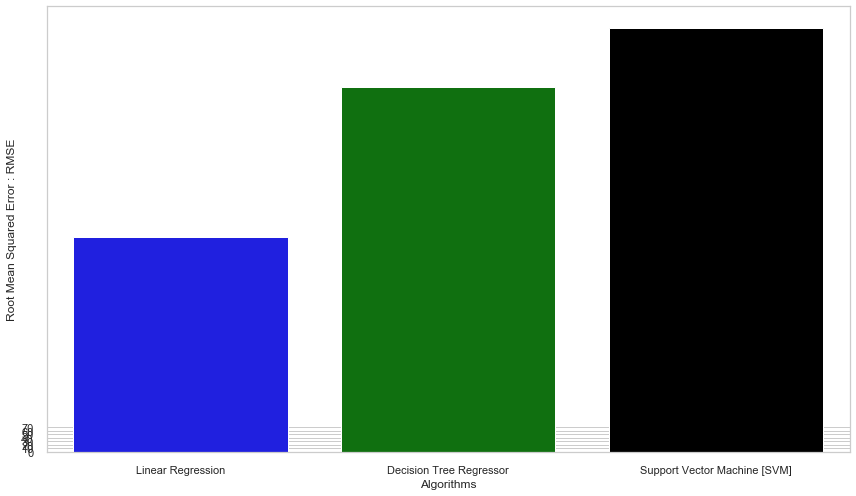

In [386]:
colors = ["blue", "green", "black"]

sns.set_style("whitegrid")
plt.figure(figsize=(12,7))
plt.yticks(np.arange(0,80,10))
plt.ylabel("Root Mean Squared Error : RMSE")
plt.xlabel("Algorithms")
sns.barplot(x=list(RMSEValues.keys()),  y=list(RMSEValues.values()), palette=colors)
plt.show()

###### From the below graph it is clear that RMSE of linear regression is less so its better than other algorithms, so we will choose linear model to test our testing data for prediction. 

### Prediction on test data using Linear Regression

In [387]:
test_data.head(2)

,F1,F2,F4,F5,F6,F7,F8,F9,F10,F12,...,F36,Europe,Rest,UK,USA,High,Low,Medium,Very high,Very low
0,0.652492,0.623796,0.395062,0.434648,0.327517,0.691485,0.611088,0.582071,0.516627,0.625989,...,0.7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.569764,0.546476,0.558128,0.392702,0.438504,0.330976,0.385525,0.330899,0.574109,0.712542,...,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [388]:
predicted_test_linear_Profit = model_lr.predict(test_data)


In [390]:
final_prediction = predicted_test_linear_Profit.tolist()
print(predicted_test_linear_Profit.tolist())

[496.0, -812.0, -633.0, 1986.0, 2157.5, 2883.5, 1347.5, 733.5, 1742.5, 1624.5, 1441.0, -288.5, 1272.5, 537.0, 2096.5, 358.5, 1126.0, 1305.0, 2864.5, 1401.0, 1479.0, 1703.0, 2196.5, 365.0, 1995.0, 1018.5, 1999.5, 2302.5, 1917.5, 1397.0, 529.5, 1025.5, 993.5, 417.5, -203.5, -351.0, -706.5, 675.5, 2311.0, -232.5, -390.0, 1164.5, -1285.0, -634.5, 2260.5, 690.5, 1648.5, -395.0, -362.5, -333.5, 681.5, 1724.0, 1587.5, -142.5, -396.5, 2997.0, 2223.5, 910.0, 559.0, 324.0, 1074.0, 794.0, 2643.5, 933.0, 1984.5, 674.5, 417.5, 833.0, 2135.5, -1.5, 695.0, 3581.0, 931.0, 570.0, 1274.0, 1206.5, 2006.0, -835.5, -2139.0, 822.0, 723.5, 1607.0, 2073.5, -193.0, 604.0, -1522.5, 724.5, 344.5, 348.5, 590.0, 194.5, 1116.5, -499.5, 746.5, -441.0, 978.0, 729.5, 2081.0, 115.0, 1928.5, 1059.0, 1195.0, 1158.5, 1072.5, 1898.0, 1262.0, 26.5, 1356.5, 231.0, 2291.5, 11.5, 1516.0, 609.5, 749.0, 685.0, 980.5, 1069.0, 2142.0, 3155.5, 1215.5, -589.0, 1967.5, 893.0, -290.5, 1585.5, 771.0, 1205.0, 81.5, 2672.0, 672.5, 1254.0

### Part B

In [392]:
# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

predicted = final_prediction # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df1.iloc[:,-1] = predicted

# Save to the destination file
test_df1.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])